# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [3]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    i=0
    j=0
    sum=0

    while i<len(Y_train):
        if Y_train[i]==1:
            sum+=1
        i+=1
    P1=sum/len(Y_train)                                #P1=P(Y=1)
    P2=1-P1                                            #P2=P(Y=-1)

    sum_array_pos=np.array([0,0])
    sum_array_neg=np.array([0,0])
    while j<len(Y_train):
        if Y_train[j]==1:
            sum_array_pos=sum_array_pos+X_train[j,:]
        else:
            sum_array_neg=sum_array_neg+X_train[j,:]
        j+=1
    
    mu_pos=(1/sum)*sum_array_pos
    mu_neg=(1/(len(Y_train)-sum))*sum_array_neg
    w=mu_neg-mu_pos
    mu_pos_norm=((mu_pos[0])**2)+((mu_pos[1])**2)
    mu_neg_norm=((mu_neg[0])**2)+((mu_neg[1])**2)
    b=(mu_pos_norm-mu_neg_norm)/2+np.log(P1/P2)
    
    eta_x=P1/(P1+P2*(np.exp((np.dot(w,np.transpose(X_test)))+b)))
    
    Y_test_pred=np.sign(2*eta_x-1)
    
    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    x_pos=X_train[Y_train==1,:]
    x_neg=X_train[Y_train==-1,:]

    sum=0
    i=0
    while i<len(Y_train):
        if Y_train[i]==1:
            sum+=1
        i+=1
    P1=sum/len(Y_train)
    P2=1-P1

    b=np.log(P1/P2)

    j=0
    sum_array_pos=np.array([0,0])
    sum_array_neg=np.array([0,0])
    while j<len(Y_train):
        if Y_train[j]==1:
            sum_array_pos=sum_array_pos+X_train[j,:]
        else:
            sum_array_neg=sum_array_neg+X_train[j,:]
        j+=1
    
    mu_pos=(1/sum)*sum_array_pos
    mu_neg=(1/(len(Y_train)-sum))*sum_array_neg

    cov_pos=np.cov(x_pos.T,bias=True)*len(x_pos)
    cov_neg=np.cov(x_neg.T,bias=True)*len(x_neg)
    cov=(cov_pos + cov_neg)/len(X_train)
    cov_inv=np.linalg.inv(cov)
    coeff_pos=(X_test-mu_pos)
    coeff2_pos=(np.matmul(coeff_pos,cov_inv)*coeff_pos).sum(axis=1)
    coeff_neg=(X_test-mu_neg)
    coeff2_neg=(np.matmul(coeff_neg,cov_inv)*coeff_neg).sum(axis=1)

    eta=1/(1+ np.exp(b+0.5*coeff2_pos-0.5*coeff2_neg))

    Y_test_pred=np.sign(2*eta-1)

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    x_pos=X_train[Y_train==1,:]
    x_neg=X_train[Y_train==-1,:]

    sum=0
    i=0
    while i<len(Y_train):
        if Y_train[i]==1:
            sum+=1
        i+=1
    P1=sum/len(Y_train)
    P2=1-P1

    b=np.log(P1/P2)

    j=0
    sum_array_pos=np.array([0,0])
    sum_array_neg=np.array([0,0])
    while j<len(Y_train):
        if Y_train[j]==1:
            sum_array_pos=sum_array_pos+X_train[j,:]
        else:
            sum_array_neg=sum_array_neg+X_train[j,:]
        j+=1
    
    mu_pos=(1/sum)*sum_array_pos
    mu_neg=(1/(len(Y_train)-sum))*sum_array_neg

    cov_pos=np.cov(x_pos.T,bias=True)
    cov_neg=np.cov(x_neg.T,bias=True)
    cov_pos_inv=np.linalg.inv(cov_pos)
    cov_neg_inv=np.linalg.inv(cov_neg)
    coeff_pos=(X_test-mu_pos)
    coeff2_pos=(np.matmul(coeff_pos,cov_pos_inv)*coeff_pos).sum(axis=1)
    coeff_neg=(X_test-mu_neg)
    coeff2_neg=(np.matmul(coeff_neg,cov_neg_inv)*coeff_neg).sum(axis=1)
    det_pos=np.linalg.det(cov_pos)**0.5
    det_neg=np.linalg.det(cov_neg)**0.5

    eta=1/(1+(det_pos/det_neg)*np.exp(b+0.5*coeff2_pos-0.5*coeff2_neg))

    Y_test_pred=np.sign(2*eta-1)

    return Y_test_pred

In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


<Figure size 640x480 with 0 Axes>

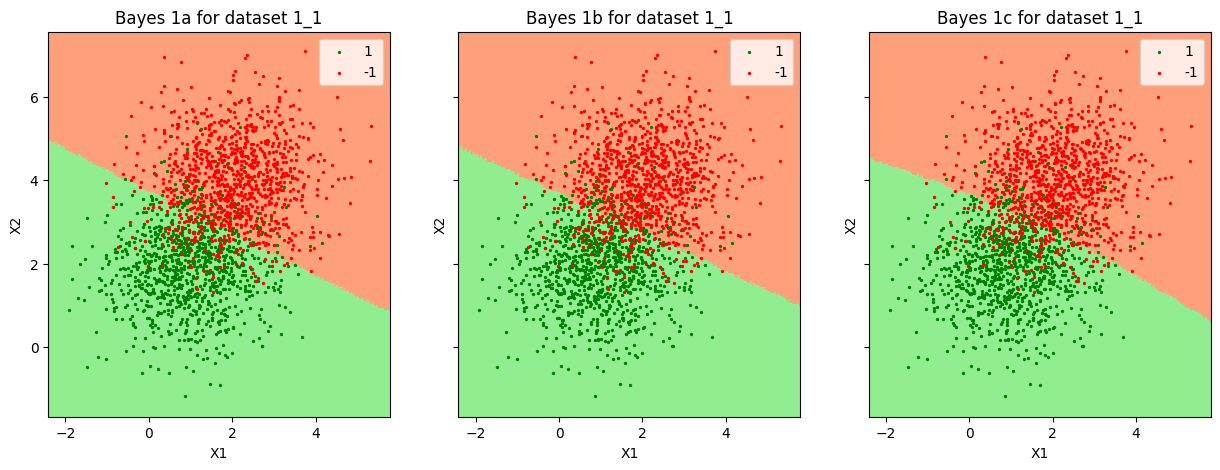

<Figure size 640x480 with 0 Axes>

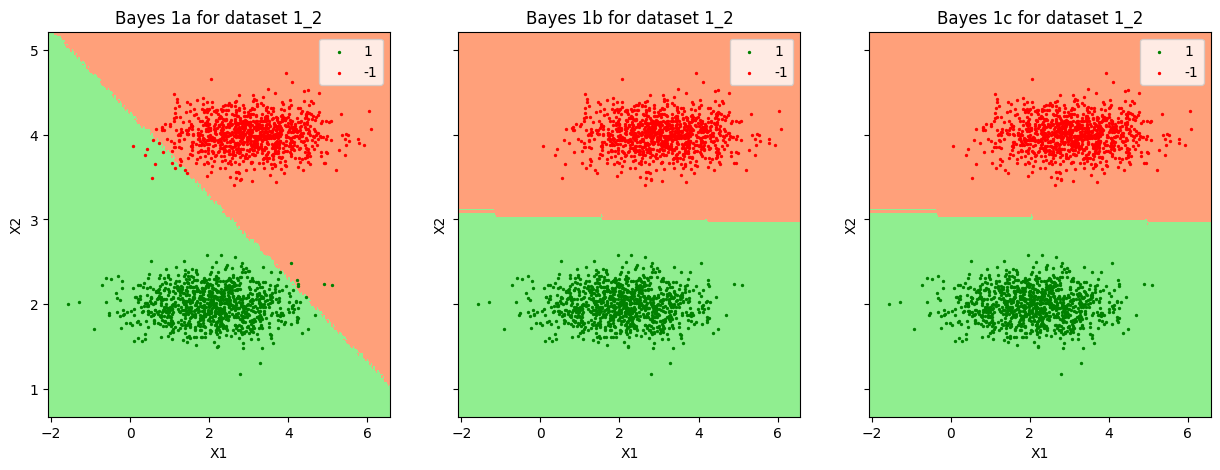

<Figure size 640x480 with 0 Axes>

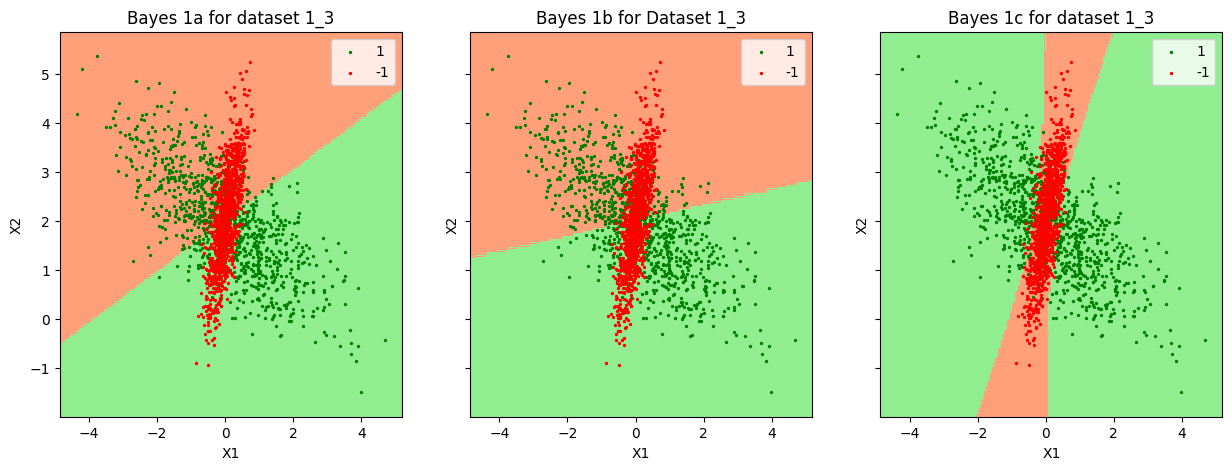

In [8]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
data1_1=np.load('dataset1_1.npz')
X_train=data1_1['arr_0']
Y_train=data1_1['arr_1']
X_test=data1_1['arr_2']
Y_pred_test_d1a=Bayes1a(X_train,Y_train,X_test)
Y_pred_test_d1b=Bayes1b(X_train,Y_train,X_test)
Y_pred_test_d1c=Bayes1c(X_train,Y_train,X_test)
X_min=min(X_train[:,0]),min(X_train[:,1])
X_max=max(X_train[:,0]),max(X_train[:,1])

A,B=np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test=np.concatenate([A.reshape(-1,1),B.reshape(-1,1)],axis=1)
Ca=Bayes1a(X_train,Y_train,test)
Cb=Bayes1b(X_train,Y_train,test)
Cc=Bayes1c(X_train,Y_train,test)

plt.figure(0)
f,ax=plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax[0].contourf(A,B,Ca.reshape(A.shape),colors=['lightsalmon','lightgreen'])
ax[0].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[0].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='-1')
ax[0].set_title('Bayes 1a for dataset 1_1')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].legend() 

ax[1].contourf(A,B,Cb.reshape(A.shape),colors=['lightsalmon','lightgreen'])
ax[1].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='1')
ax[1].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r', label='-1')
ax[1].set_title('Bayes 1b for dataset 1_1')
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
ax[1].legend()

ax[2].contourf(A,B,Cc.reshape(A.shape),colors=['lightsalmon','lightgreen'])
ax[2].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='1')
ax[2].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r', label='-1')
ax[2].set_title('Bayes 1c for dataset 1_1')
ax[2].set_xlabel('X1')
ax[2].set_ylabel('X2')
ax[2].legend()
plt.show()

data1_2=np.load('dataset1_2.npz')
X_train=data1_2['arr_0']
Y_train=data1_2['arr_1']
X_test=data1_2['arr_2']
Y_test=data1_2['arr_3']
Y_pred_test_d2a=Bayes1a(X_train,Y_train,X_test)
Y_pred_test_d2b=Bayes1b(X_train,Y_train,X_test)
Y_pred_test_d2c=Bayes1c(X_train,Y_train,X_test)
X_min=min(X_train[:,0]),min(X_train[:,1])
X_max=max(X_train[:,0]),max(X_train[:,1])

A,B=np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test=np.concatenate([A.reshape(-1,1),B.reshape(-1,1)],axis=1)
Ca=Bayes1a(X_train,Y_train,test)
Cb=Bayes1b(X_train,Y_train,test)
Cc=Bayes1c(X_train,Y_train,test)

plt.figure(1)
f,ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax[0].contourf(A,B,Ca.reshape(A.shape),colors=['lightsalmon','lightgreen'])
ax[0].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[0].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='-1')
ax[0].set_title('Bayes 1a for dataset 1_2')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].legend()

ax[1].contourf(A,B,Cb.reshape(A.shape),colors=['lightsalmon','lightgreen'])
ax[1].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='1')
ax[1].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r', label='-1')
ax[1].set_title('Bayes 1b for dataset 1_2')
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
ax[1].legend()

ax[2].contourf(A,B,Cc.reshape(A.shape),colors=['lightsalmon','lightgreen'])
ax[2].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[2].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r', label='-1')
ax[2].set_title('Bayes 1c for dataset 1_2')
ax[2].set_xlabel('X1')
ax[2].set_ylabel('X2')
ax[2].legend()
plt.show()

data1_3=np.load('dataset1_3.npz')
X_train=data1_3['arr_0']
Y_train=data1_3['arr_1']
X_test=data1_3['arr_2']
Y_test=data1_3['arr_3']
Y_pred_test_13a=Bayes1a(X_train,Y_train,X_test)
Y_pred_test_13b=Bayes1b(X_train,Y_train,X_test)
Y_pred_test_13c=Bayes1c(X_train,Y_train,X_test)
X_min=min(X_train[:,0]),min(X_train[:,1])
X_max=max(X_train[:,0]),max(X_train[:,1])

A,B=np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test=np.concatenate([A.reshape(-1,1),B.reshape(-1,1)],axis=1)
Ca=Bayes1a(X_train,Y_train,test)
Cb=Bayes1b(X_train,Y_train,test)
Cc=Bayes1c(X_train,Y_train,test)

plt.figure(2)
f,ax=plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax[0].contourf(A,B,Ca.reshape(A.shape),colors=['lightsalmon','lightgreen'])
ax[0].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[0].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='-1')
ax[0].set_title('Bayes 1a for dataset 1_3')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].legend()

ax[1].contourf(A,B,Cb.reshape(A.shape),colors=['lightsalmon','lightgreen'])
ax[1].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[1].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='-1')
ax[1].set_title('Bayes 1b for Dataset 1_3')
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
ax[1].legend()

ax[2].contourf(A,B,Cc.reshape(A.shape),colors=['lightsalmon','lightgreen'])
ax[2].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[2].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='-1')
ax[2].set_title('Bayes 1c for dataset 1_3')
ax[2].set_xlabel('X1')
ax[2].set_ylabel('X2')
ax[2].legend()
plt.show()

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

Observations:


1. The Bayes1a classifier assumes feature conditional independence given the classes, resulting in a decision function linear with respect to the features.
2. The Bayes1b classifier assumes common covariance matrices for class conditional distributions, maintaining a linear decision boundary even in this scenario.
3. The Bayes2c classifier accounts for varying covariance matrices in class conditional distributions, allowing for non-linear decision boundaries based on feature relationships.
4. Observing dataset1_1, where clusters display uncorrelated data points, we anticipate similar performance across Bayes1a, Bayes1b, and Bayes2c classifiers as illustrated in the provided plots.
5. In dataset1_2, where features exhibit correlation yet data points are linearly separable, Bayes1a's decision boundary aligns perpendicularly to the line connecting class conditional distribution mean vectors. Bayes1b, incorporating feature covariance, improves separation akin to Bayes1c.
6. In dataset1_3, where linear separation is impossible, Bayes1a and Bayes2b classifiers falter, reflected in their error rates. However, Bayes1c, accommodating non-linear decision boundaries, effectively separates the class data points.

The error rates(%) are:



Classifier | dataset1_1 | dataset1_2 | dataset1_3 
--- | --- | --- | ---
Bayes 1a | 12.6 |  0.85 | 49.7 
Bayes 1b | 12.45 |  0.0 | 49.5
Bayes 1c | 12.45 |  0.0 | 13.5





** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [10]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    L=[[0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]]

    x_1=X_train[Y_train==1,:]
    x_2=X_train[Y_train==2,:]
    x_3=X_train[Y_train==3,:]
    x_4=X_train[Y_train==4,:]

    sum1=0
    sum2=0
    sum3=0
    sum4=0
    j=0
    sum_array_1=np.array([0,0])
    sum_array_2=np.array([0,0])
    sum_array_3=np.array([0,0])
    sum_array_4=np.array([0,0])
    while j<len(Y_train):
        if Y_train[j]==1:
            sum1+=1
            sum_array_1=sum_array_1+X_train[j,:]
        elif Y_train[j]==2:
            sum2+=1
            sum_array_2=sum_array_2+X_train[j,:]
        elif Y_train[j]==3:
            sum3+=1
            sum_array_3=sum_array_3+X_train[j,:]
        elif Y_train[j]==4:
            sum4+=1
            sum_array_4=sum_array_4+X_train[j,:]
        j+=1
    
    mu_1=(1/sum1)*sum_array_1
    mu_2=(1/sum2)*sum_array_2
    mu_3=(1/sum3)*sum_array_3
    mu_4=(1/sum4)*sum_array_4

    Y_test_pred=np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):

      eta1=np.exp(-0.5*np.linalg.norm(X_test[i,:]-mu_1)**2)*len(x_1)
      eta2=np.exp(-0.5*np.linalg.norm(X_test[i,:]-mu_2)**2)*len(x_2)
      eta3=np.exp(-0.5*np.linalg.norm(X_test[i,:]-mu_3)**2)*len(x_3)
      eta4=np.exp(-0.5*np.linalg.norm(X_test[i,:]-mu_4)**2)*len(x_4)

      eta_x=[eta1,eta2,eta3,eta4]

      eta_xL=np.matmul(np.transpose(eta_x),L)

      Y_test_pred[i] = np.argmin(eta_xL)+1

    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    L=[[0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]]

    x_1=X_train[Y_train==1,:]
    x_2=X_train[Y_train==2,:]
    x_3=X_train[Y_train==3,:]
    x_4=X_train[Y_train==4,:]

    sum1=0
    sum2=0
    sum3=0
    sum4=0
    j=0
    sum_array_1=np.array([0,0])
    sum_array_2=np.array([0,0])
    sum_array_3=np.array([0,0])
    sum_array_4=np.array([0,0])
    while j<len(Y_train):
        if Y_train[j]==1:
            sum1+=1
            sum_array_1=sum_array_1+X_train[j,:]
        elif Y_train[j]==2:
            sum2+=1
            sum_array_2=sum_array_2+X_train[j,:]
        elif Y_train[j]==3:
            sum3+=1
            sum_array_3=sum_array_3+X_train[j,:]
        elif Y_train[j]==4:
            sum4+=1
            sum_array_4=sum_array_4+X_train[j,:]
        j+=1
    
    mu_1=(1/sum1)*sum_array_1
    mu_2=(1/sum2)*sum_array_2
    mu_3=(1/sum3)*sum_array_3
    mu_4=(1/sum4)*sum_array_4

    cov_1=np.cov(x_1.T,bias=True)*len(x_1)
    cov_2=np.cov(x_2.T,bias=True)*len(x_2)
    cov_3=np.cov(x_3.T,bias=True)*len(x_3)
    cov_4=np.cov(x_4.T,bias=True)*len(x_4)
    cov=(cov_1+cov_2+cov_3+cov_4)/len(X_train)

    Y_test_pred=np.zeros(X_test.shape[0])


    for i in range(X_test.shape[0]):

      eta1=len(x_1)*(np.linalg.det(cov)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mu_1),np.linalg.inv(cov)),X_test[i,:]-mu_1)/2)
      eta2=len(x_2)*(np.linalg.det(cov)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mu_2),np.linalg.inv(cov)),X_test[i,:]-mu_2)/2)
      eta3=len(x_3)*(np.linalg.det(cov)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mu_3),np.linalg.inv(cov)),X_test[i,:]-mu_3)/2)
      eta4=len(x_4)*(np.linalg.det(cov)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mu_4),np.linalg.inv(cov)),X_test[i,:]-mu_4)/2)

      eta_x=[eta1,eta2,eta3,eta4]

      eta_xL=np.matmul(np.transpose(eta_x),L)

      Y_test_pred[i]=np.argmin(eta_xL)+1
      
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    L=[[0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]]

    x_1=X_train[Y_train==1,:]
    x_2=X_train[Y_train==2,:]
    x_3=X_train[Y_train==3,:]
    x_4=X_train[Y_train==4,:]

    sum1=0
    sum2=0
    sum3=0
    sum4=0
    j=0
    sum_array_1=np.array([0,0])
    sum_array_2=np.array([0,0])
    sum_array_3=np.array([0,0])
    sum_array_4=np.array([0,0])
    while j<len(Y_train):
        if Y_train[j]==1:
            sum1+=1
            sum_array_1=sum_array_1+X_train[j,:]
        elif Y_train[j]==2:
            sum2+=1
            sum_array_2=sum_array_2+X_train[j,:]
        elif Y_train[j]==3:
            sum3+=1
            sum_array_3=sum_array_3+X_train[j,:]
        elif Y_train[j]==4:
            sum4+=1
            sum_array_4=sum_array_4+X_train[j,:]
        j+=1
    
    mu_1=(1/sum1)*sum_array_1
    mu_2=(1/sum2)*sum_array_2
    mu_3=(1/sum3)*sum_array_3
    mu_4=(1/sum4)*sum_array_4

    cov_1=np.cov(x_1.T,bias=True)
    cov_2=np.cov(x_2.T,bias=True)
    cov_3=np.cov(x_3.T,bias=True)
    cov_4=np.cov(x_4.T,bias=True)

    Y_test_pred=np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):

      eta1=len(x_1)*(np.linalg.det(cov_1)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mu_1),np.linalg.inv(cov_1)),X_test[i,:]-mu_1)/2)
      eta2=len(x_2)*(np.linalg.det(cov_2)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mu_2),np.linalg.inv(cov_2)),X_test[i,:]-mu_2)/2)
      eta3=len(x_3)*(np.linalg.det(cov_3)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mu_3),np.linalg.inv(cov_3)),X_test[i,:]-mu_3)/2)
      eta4=len(x_4)*(np.linalg.det(cov_4)**(-0.5))*np.exp(-np.matmul(np.matmul(np.transpose(X_test[i,:]-mu_4),np.linalg.inv(cov_4)),X_test[i,:]-mu_4)/2)

      eta_x=[eta1,eta2,eta3,eta4]

      eta_xL=np.matmul(np.transpose(eta_x),L)

      Y_test_pred[i]=np.argmin(eta_xL)+1
      
    return Y_test_pred 

def confusion_matrix(Y,Y_pred):
    
    labels=np.unique(Y)
    conf_mat=np.zeros((len(labels),len(labels)))

    for i in range(len(labels)):
        for j in range(len(labels)):
            conf_mat[i][j]=((Y==i+1)*(Y_pred==j+1)).sum()

    return conf_mat 

In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


<Figure size 640x480 with 0 Axes>

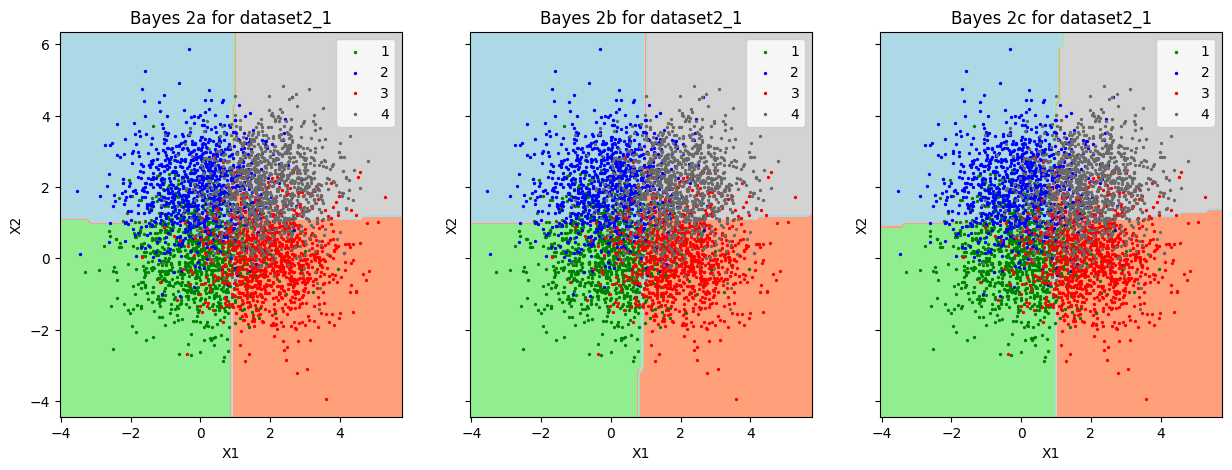

<Figure size 640x480 with 0 Axes>

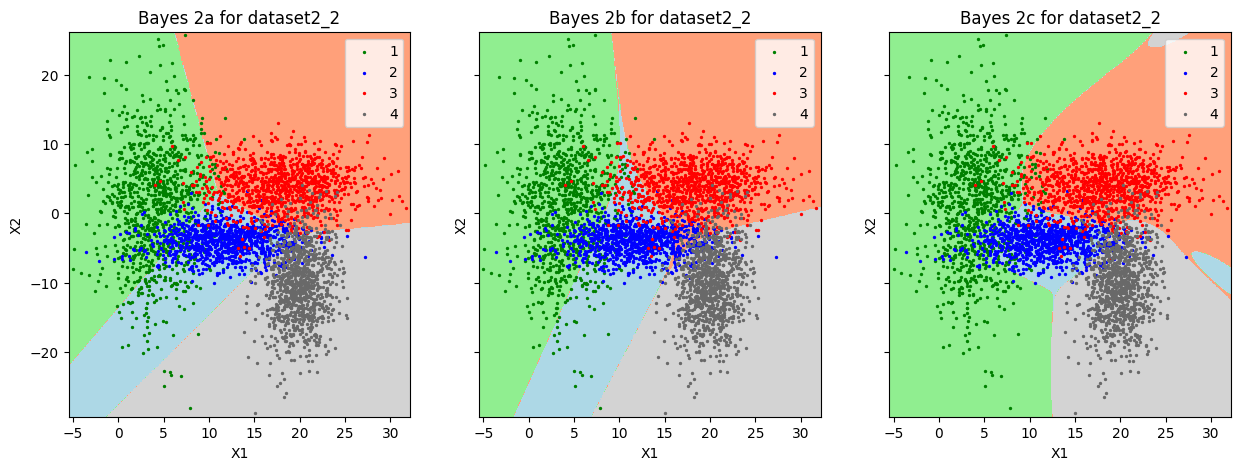

In [11]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
data2_1=np.load('dataset2_1.npz')
X_train=data2_1['arr_0']
Y_train=data2_1['arr_1']
X_test=data2_1['arr_2']
Y_test=data2_1['arr_3']
Y_pred_test_21a=Bayes2a(X_train,Y_train,X_test)
Y_pred_test_21b=Bayes2b(X_train,Y_train,X_test)
Y_pred_test_21c=Bayes2c(X_train,Y_train,X_test)
X_min=np.min(X_train,axis=0)
X_max=np.max(X_train,axis=0)
L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

loss=L[Y_test.astype(int)-1,Y_pred_test_21a.astype(int)-1]
loss=np.sum(loss,axis=0)*1.0/len(Y_test)
loss=L[Y_test.astype(int)-1,Y_pred_test_21b.astype(int)-1]
loss=sum(loss)*1.0/len(Y_test)
loss=L[Y_test.astype(int)-1,Y_pred_test_21c.astype(int)-1]
loss=sum(loss)*1.0/len(Y_test)

A,B=np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.1),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.1))
test=np.concatenate([A.reshape(-1,1),B.reshape(-1,1)],axis=1)
Ca=Bayes2a(X_train,Y_train,test)
Cb=Bayes2b(X_train,Y_train,test)
Cc=Bayes2c(X_train,Y_train,test)

plt.figure(0)
f,ax=plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax[0].contourf(A,B,Ca.reshape(A.shape),colors=['lightgreen','lightsalmon','lightblue','lightgrey']) 
ax[0].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[0].scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='b',label='2')
ax[0].scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='r',label='3')
ax[0].scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='dimgrey',label='4')
ax[0].set_title('Bayes 2a for dataset2_1')
ax[0].legend()
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')

ax[1].contourf(A,B,Cb.reshape(A.shape),colors=['lightgreen','lightsalmon','lightblue','lightgrey'])
ax[1].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[1].scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='b',label='2')
ax[1].scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='r',label='3')
ax[1].scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='dimgrey',label='4')
ax[1].set_title('Bayes 2b for dataset2_1')
ax[1].legend()
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')

ax[2].contourf(A,B,Cc.reshape(A.shape),colors=['lightgreen','lightsalmon','lightblue','lightgrey'])
ax[2].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[2].scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='b',label='2')
ax[2].scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='r',label='3')
ax[2].scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='dimgrey',label='4')
ax[2].set_title('Bayes 2c for dataset2_1')
ax[2].legend()
ax[2].set_xlabel('X1')
ax[2].set_ylabel('X2')
plt.show()

data2_2=np.load('dataset2_2.npz')
X_train=data2_2['arr_0']
Y_train=data2_2['arr_1']
X_test=data2_2['arr_2']
Y_test=data2_2['arr_3']
Y_pred_test_22a=Bayes2a(X_train,Y_train,X_test)
Y_pred_test_22b=Bayes2b(X_train,Y_train,X_test)
Y_pred_test_22c=Bayes2c(X_train,Y_train,X_test)
X_min=min(X_train[:,0]),min(X_train[:,1])
X_max=max(X_train[:,0]),max(X_train[:,1])

loss=L[Y_test.astype(int)-1,Y_pred_test_22a.astype(int)-1]
loss=np.sum(loss,axis=0)*1.0/len(Y_test)
loss=L[Y_test.astype(int)-1,Y_pred_test_22b.astype(int)-1]
loss=sum(loss)*1.0/len(Y_test)
loss=L[Y_test.astype(int)-1,Y_pred_test_22c.astype(int)-1]
loss=sum(loss)*1.0/len(Y_test)

A,B=np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.1),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.1))
test=np.concatenate([A.reshape(-1,1),B.reshape(-1,1)],axis=1)
Ca=Bayes2a(X_train,Y_train,test)
Cb=Bayes2b(X_train,Y_train,test)
Cc=Bayes2c(X_train,Y_train,test)

plt.figure(1)
f,ax=plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax[0].contourf(A,B,Ca.reshape(A.shape),colors=['lightgreen','lightsalmon','lightblue','lightgrey'])
ax[0].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[0].scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='b',label='2')
ax[0].scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='r',label='3')
ax[0].scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='dimgrey',label='4')
ax[0].set_title('Bayes 2a for dataset2_2')
ax[0].legend()
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')

ax[1].contourf(A,B,Cb.reshape(A.shape),colors=['lightgreen','lightsalmon','lightblue','lightgrey'])
ax[1].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[1].scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='b',label='2')
ax[1].scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='r',label='3')
ax[1].scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='dimgrey',label='4')
ax[1].set_title('Bayes 2b for dataset2_2')
ax[1].legend()
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')

ax[2].contourf(A,B,Cc.reshape(A.shape),colors=['lightgreen','lightsalmon','lightblue','lightgrey'])
ax[2].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='1')
ax[2].scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='b',label='2')
ax[2].scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='r',label='3')
ax[2].scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='dimgrey',label='4')
ax[2].set_title('Bayes 2c for dataset2_2')
ax[2].legend()
ax[2].set_xlabel('X1')
ax[2].set_ylabel('X2')
plt.show()

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

**Observations:**

1. The Bayes 2a classifier is suitable for data with independent features given the labels, but it's limited to handling linearly separable data.
2. The Bayes 2b classifier is capable of handling data with class conditional distributions having a shared covariance matrix, providing a constrained model.
3. The Bayes 2c classifier is designed to accommodate data with varying covariance matrices among class conditional distributions, offering enhanced model flexibility.
4. In dataset2_1, where features seem uncorrelated within each class, the decision boundaries of all three models closely resemble each other. As anticipated, Bayes 2c exhibits the least expected loss.
5. For dataset2_2, differing covariances exist among class conditional distributions.
6. Bayes 2a exhibits inferior performance, relying solely on the direction of the mean vector differences between classes for decision boundary placement.
7. Bayes 2b performs similarly to Bayes 2a, as it struggles with varying feature correlations across classes.
8. Bayes 2c outperforms the others, as indicated by the confusion matrix, showcasing its superior performance.

The expected loss is:

Classifier | dataset2_1 | dataset2_2  
--- | --- | --- 
Bayes 2a | 0.42975 |    0.1835
Bayes 2b | 0.429 |  0.1895
Bayes 2c | 0.42775 |  0.14075

The Confusion matrices for the given datasets are:

dataset2_1:

Confusion matrix for Bayes2a : 
$\begin{bmatrix} 633& 219& 136&  12\\ 97& 738&  62& 103\\86&  49& 770&  95\\ 15& 136& 194& 655 \end{bmatrix}$ 
  
Confusion matrix for Bayes2b : 
$\begin{bmatrix} 633& 218& 137&  12\\ 95& 743&  60& 102\\ 84& 49& 773&  94\\16& 137& 196& 651 \end{bmatrix}$ 
 
 
Confusion matrix for Bayes2c : 
$\begin{bmatrix}634& 217& 138&  11\\99& 742& 61& 98\\ 87& 47& 772&  94\\ 15& 134& 201& 650 \end{bmatrix}$ 
 

dataset2_2:

Confusion matrix for Bayes2a : 
$\begin{bmatrix} 830& 150&  18&  2\\ 93& 784&  46& 77\\ 30&  61& 905& 4\\ 0&  23& 78&899\end{bmatrix}$ 
 
Confusion matrix for Bayes2b : 
$\begin{bmatrix} 891&106& 3&  0\\ 119& 691& 124& 66\\ 23&106&864& 7\\ 0&   5& 102& 893 \end{bmatrix}$ 

 
Confusion matrix for Bayes2c : 
$\begin{bmatrix}901&  80&  19& 0\\64& 824& 46& 66\\ 19&  31& 936&  14\\ 0&  36&  48& 916 \end{bmatrix}$ 

Note : All entries in the confusion matrices must be divided by 4000( that is they are scaled up by 4000 in the above text.)



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




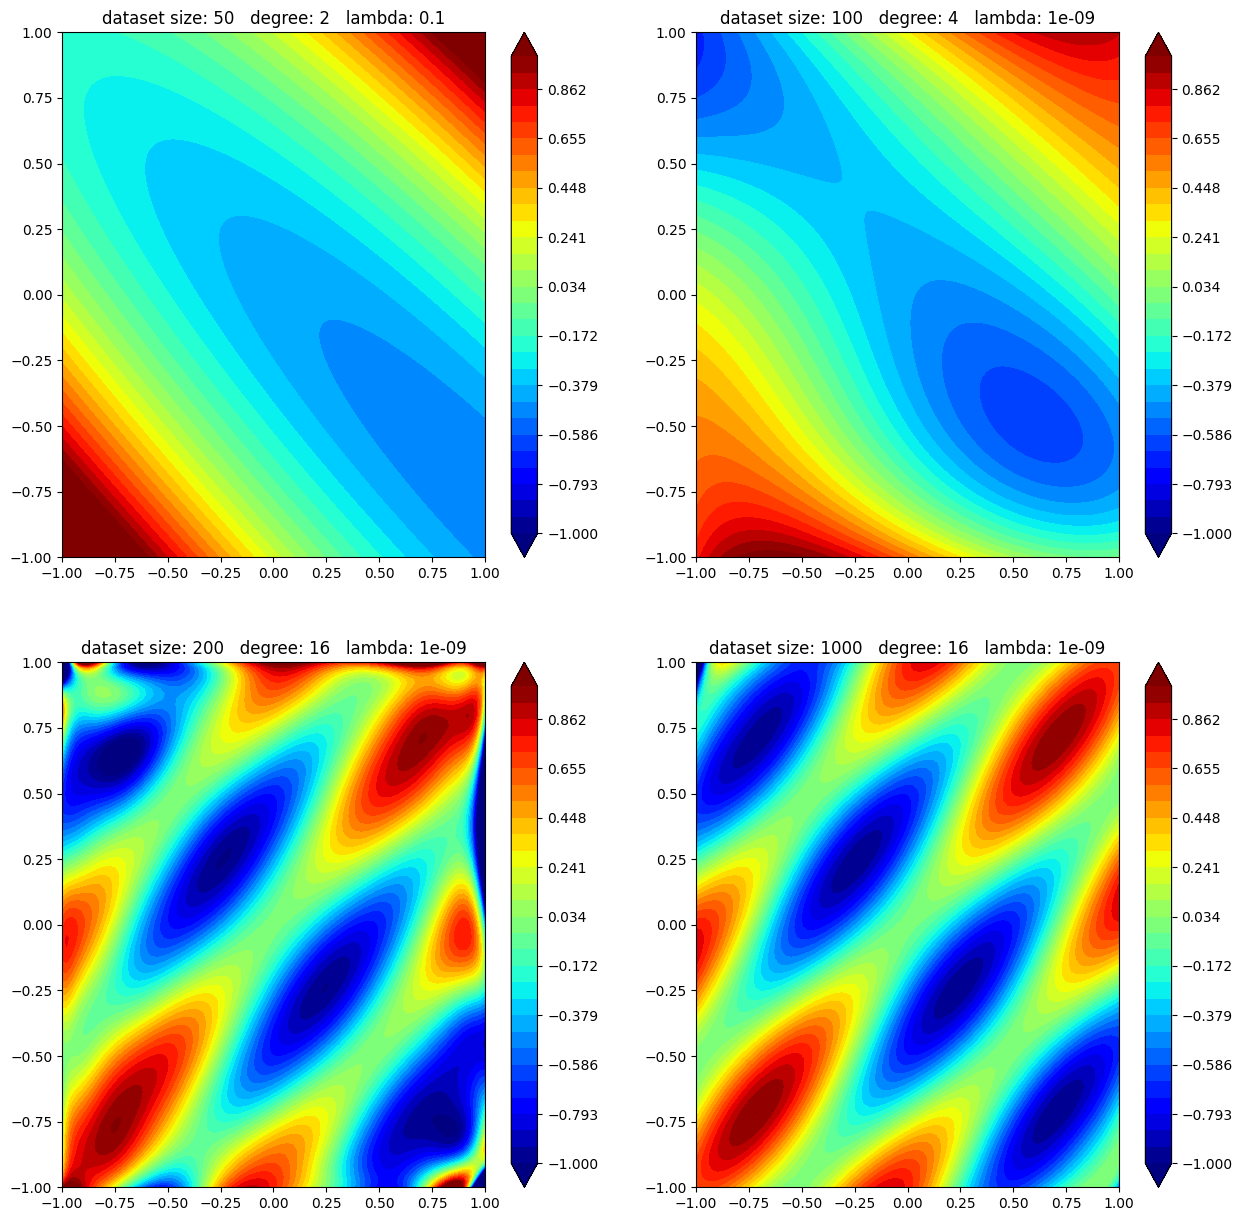

In [4]:
# Cell type : CodeWrite 
def poly_ridge_reg_train(X_train,Y_train,degree,lambda_reg):
    x_1=np.zeros((len(X_train),degree+1))
    x_2=np.zeros((len(X_train),degree+1))
    
    for i in range(degree+1):
        x_1[:,i]=X_train[:,0]**i
        x_2[:,i]=X_train[:,1]**i
    phi=np.ones((X_train.shape[0],1))
    d_dash=int(((degree+1)*(degree+2))/2)
    for i in range(degree+1):
        for j in range(degree+1):
            if i+j!=0 and i+j<=degree:
                phi = np.hstack((phi, (x_1[:,j]*x_2[:,i]).reshape(-1,1)))
    w = np.linalg.inv((np.matmul(phi.T,phi)+lambda_reg*np.eye(d_dash)))@(phi.T)@Y_train
    return w
                
def poly_ridge_reg_pred(X_test,w,degree):
    x_1=np.zeros((len(X_test),degree+1))
    x_2=np.zeros((len(X_test),degree+1))
    
    for i in range(degree+1):
        x_1[:,i]=X_test[:,0]**i
        x_2[:,i]=X_test[:,1]**i
    phi=np.ones((X_test.shape[0],1))
    d_dash=int(((degree+1)*(degree+2))/2)
    for i in range(degree+1):
        for j in range(degree+1):
            if i+j!=0 and i+j<=degree:
                phi = np.hstack((phi, (x_1[:,j]*x_2[:,i]).reshape(-1,1)))
    Y_test=np.matmul(phi,w)
    return Y_test


data3_1=np.load('dataset3_1.npz')
X_train, Y_train, X_test, Y_test = data3_1['arr_0'],data3_1['arr_1'],data3_1['arr_2'],data3_1['arr_3']

training_set= [50,100,200,1000]
degrees = [1,2,4,8,16]
lambda_reg = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

test_sq_error = np.zeros((len(training_set),len(degrees), len(lambda_reg)))
train_sq_error = np.zeros((len(training_set),len(degrees), len(lambda_reg)))

best_params = np.zeros((4,2))
low_error=np.inf
best_degree=0
best_lambda=0
for i in range(len(training_set)):
    for j in range(len(degrees)):
        for k in range(len(lambda_reg)):
            w_pred = poly_ridge_reg_train(X_train[:training_set[i],:], Y_train[:training_set[i]], degrees[j], lambda_reg[k])
            y_train_pred = poly_ridge_reg_pred(X_train[:training_set[i],:], w_pred, degrees[j])
            y_test_pred = poly_ridge_reg_pred(X_test, w_pred, degrees[j])
            test_sq_error[i,j,k] = np.mean((Y_test-y_test_pred)**2)
            train_sq_error[i,j,k] = np.mean((Y_train[:training_set[i]]-y_train_pred)**2)
            
            if test_sq_error[i,j,k] < low_error:
                low_error = test_sq_error[i,j,k]
                best_degree = j
                best_lambda = k
                for m in range(len(best_params[0])):
                    best_params[i,0] = j
                    best_params[i,1] = k
    #print(train_sq_error[i,:,:])
    #print(test_sq_error[i,:,:])

X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
X_ = X.copy().reshape(-1,1)
Y_ = Y.copy().reshape(-1,1)

X_test = np.hstack((X_,Y_))
plt.figure(figsize=(15,15))

for i in range(len(training_set)):

    i1 = int(best_params[i,0])
    i2 = int(best_params[i,1])

    wt_vector = poly_ridge_reg_train(X_train[:training_set[i],:], Y_train[:training_set[i]], degrees[i1], lambda_reg[i2])
    #print(X_test.shape)
    Z = poly_ridge_reg_pred(X_test, wt_vector, degrees[i1]).reshape(100,100)

    title = "dataset size: {}   degree: {}   lambda: {}".format(training_set[i], degrees[i1], lambda_reg[int(best_params[i][1])])
    plt.subplot(2,2,i+1)
    plt.contourf(X,Y,Z,levels=np.linspace(-1,1., 30), cmap='jet', extend='both')
    plt.title(title)
    plt.colorbar()
plt.show()


** Cell type : TextWrite **


**Dataset Size: 50**
		
*MSE train*	

lambda   |      1e-9 |       1e-7|      1e-5 |   1e-3 |  1e-1|1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1 | 0.26   | 0.26   | 0.26  | 0.26  | 0.26 | 0.26
Degree 2  | 0.13    | 0.13   | 0.13  | 0.13  | 0.13 | 0.165 
Degree 4  | 0.113    | 0.113   | 0.113  | 0.113  | 0.114 | 0.152
Degree 8  | 0.041 | 0.041  | 0.041 | 0.058  | 0.0093  | 0.144 
Degree 16  | 7.73e-6   | 4.84e-4 | 7.54e-3 | 4.17e-2 | 8.37e-2 | 0.1

*MSE test*			

lambda  |    1e-9 |      1e-7|     1e-5 |    1e-3 |   1e-1 |  1e1
--- | --- | --- |--- |--- |--- |--- 
Degree 1  | 0.3 |  0.3 | 0.3 | 0.3 | 0.3 | 0.278
Degree 2  |  0.158   |  0.158   | 0.158| 0.158 | 0.156 | 0.208
Degree 4  |   0.157 |  0.157 | 0.157 | 0.157 | 0.162 | 0.196
Degree 8  | 237.69    | 172.5   | 18.59 | 0.99 | 0.165 | 0.194
Degree 16 | 250.52   | 232.02  | 66.7  | 2.34 | 0.204 | 0.196 

MSE_test lowest for 	degree: **2**	  lambda: **0.1** and
MSE_train lowest for 	degree: **2**	  lambda: **0.1**

**Dataset Size: 100**

*MSE train*		

lambda   |        1e-9 |       1e-7 |      1e-5 |      1e-3 |    1e-1 |     1e1
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.25   | 0.25   | 0.25  | 0.25  | 0.25  | 0.256 
Degree 2     | 0.134   | 0.134   | 0.134  | 0.134  | 0.134 | 0.197 
Degree 4     | 0.102    | 0.102   | 0.102  | 0.102  | 0.104 | 0.181
Degree 8     | 0.00013  | 0.00019    | 0.011 | 0.042 | 0.082 | 0.163
Degree 16    | 1.95e-8 | 9.37e-6 | 1.32e-3 | 3.11e-2 | 0.07 | 0.15 

*MSE test*

lambda   |     1e-9 |      1e-7 |     1e-5 |     1e-3 |     1e-1 |      1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1     |  0.273 |  0.273 | 0.273 | 0.273 | 0.273 | 0.269 
Degree 2     |  0.153  | 0.153  |0.153 | 0.153 | 0.153 | 0.176
Degree 4    |  0.143 | 0.143 | 0.143 | 0.143  | 0.146  | 0.169
Degree 8     |  0.713  |  0.711 | 0.581 | 0.204 | 0.163 | 0.171
Degree 16    | 54.081   | 11.77   | 23.42 | 0.42 | 0.188  | 0.174  

MSE_test lowest for 	degree: **4**	  lambda: **1e-09** and
MSE_train lowest for 	degree: **4**	  lambda: **1e-09**


**Dataset Size: 200**

*MSE train*

lambda   |       1e-9 |      1e-7 |      1e-5 |      1e-3 |     1e-1 |      1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.246   | 0.246  | 0.246  | 0.246  | 0.246 | 0.246 
Degree 2     | 0.134   | 0.134  | 0.134  | 0.134  | 0.134 |0.147 
Degree 4    | 0.113   | 0.113  | 0.113 |  0.113   | 0.113 | 0.144
Degree 8     | 0.062  | 0.062 | 0.062 | 0.064 | 0.096 | 0.141
Degree 16    | 2.88e-5 | 1.08e-3 | 1.13e-2 | 4.44e-2 | 8.35e-2 | 0.133   

*MSE test*		

lambda   |      1e-9 |     1e-7 |      1e-5 |     1e-3 |     1e-1 |      1e1
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.267  | 0.267 | 0.267  | 0.267 | 0.267 | 0.266 
Degree 2     | 0.146  | 0.146 | 0.146   | 0.146 | 0.146 | 0.159 
Degree 4     | 0.131  | 0.131 | 0.131  | 0.131 | 0.131 | 0.157 
Degree 8     | 0.137  | 0.137 | 0.137  | 0.118 | 0.114 | 0.157 
Degree 16    | 0.037 | 0.084 | 0.171 | 0.087 | 0.111 | 0.152 

MSE_test lowest for 	degree: **16**	  lambda: **1e-09** and
MSE_train lowest for 	degree: **16**	  lambda: **1e-09**

**Dataset Size: 1000**

*MSE train*	

lambda   |       1e-9 |      1e-7 |     1e-5 |   1e-3 |   1e-1  |  1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.241    | 0.241   | 0.241  | 0.241  | 0.241 | 0.241 
Degree 2     | 0.138    | 0.138   | 0.138  | 0.138  | 0.138 | 0.139 
Degree 4     | 0.125  | 0.125   | 0.125  | 0.125  | 0.125 | 0.134
Degree 8     | 0.077   | 0.077  | 0.077 | 0.078  | 0.095 | 0.128 
Degree 16    | 2.54e-5 | 4.54e-4 | 6.53e-3 | 3.84e-2 | 8.49e-2 | 0.121


*MSE test*

lambda  |       1e-9 |      1e-7 |      1e-5 |     1e-3 |     1e-1|      1e1 
--- | --- | --- |--- |--- |--- |--- 
Degree 1     | 0.262   | 0.262  | 0.262  | 0.262  | 0.262  | 0.263 
Degree 2     | 0.142   | 0.142  | 0.142  | 0.142  | 0.142 | 0.144 
Degree 4     | 0.127    | 0.127   | 0.127  | 0.127  | 0.127 | 0.141
Degree 8     | 0.085  | 0.085 | 0.085 | 0.084 | 0.098 | 0.135  
Degree 16    | 0.0012 | 0.0015 | 0.011 | 0.05 |0.091 | 0.128  

MSE_test lowest for 	degree: **16**	  lambda: **1e-09** and
MSE_train lowest for 	degree: **16**	  lambda: **1e-09**

**Observations:**

1.   For λ = 1e-9 and polynomial of degree 16, the MSE on the trainset is always the best. This is due to the fact that a higher degree polynomial with low regularisation will always better fit the training data.
2.   Although the training MSE for polynomials of higher degree is very low when the dataset size is small, the high test MSE indicates overfitting, that is, the model has simply captured all of the noise and has not learned an useful generalisation. Lower degree polynomials with a high enough λ perform better on a smaller dataset, indicating that they generalise better.
3. As degree increases, the training error always decreases.
4. The training error is always generally lesser than the test error for given degree and regularisation parameter.
5. The training error always increases with increase in regularization.
6. With a few exceptions, the test error decreases as the size of the training data increases. 
7. We can fit higher degree polynomials that generalise on the dataset when we have a larger number of data samples.
8. Increasing regularisation reduces test error significantly for small data sets and high degrees.
9. Increasing regularisation increases test error significantly for large data sets and high degree.

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











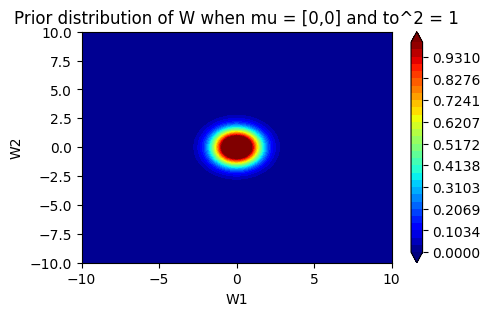

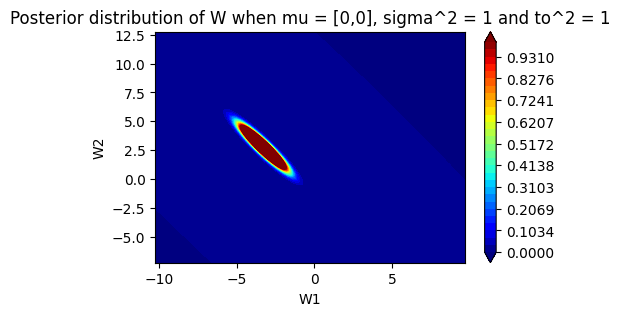

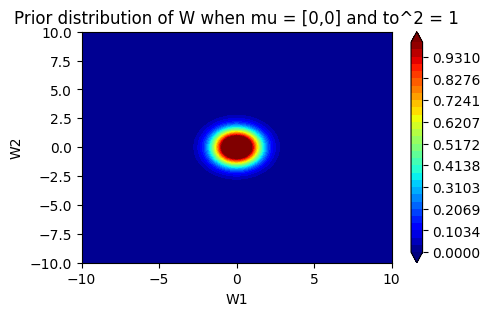

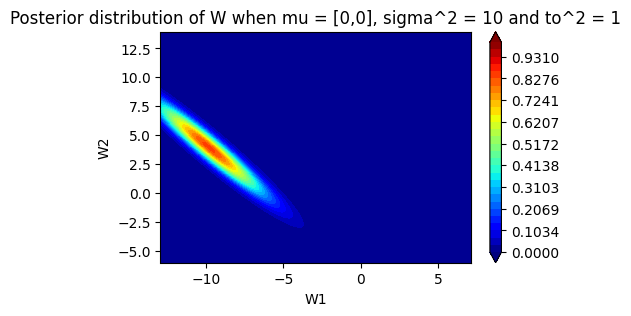

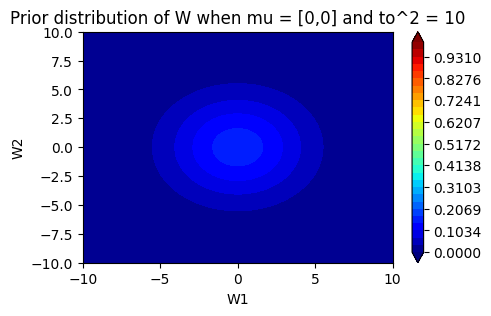

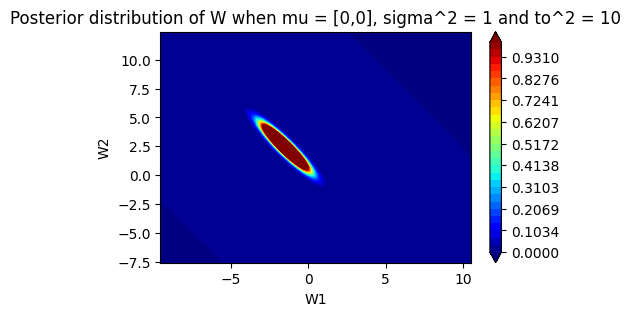

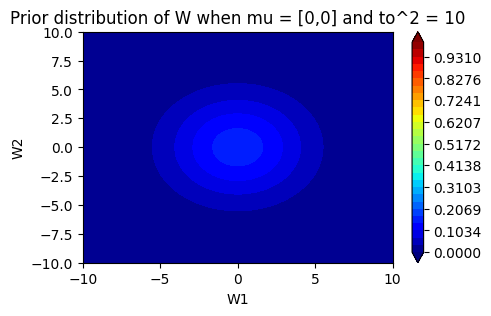

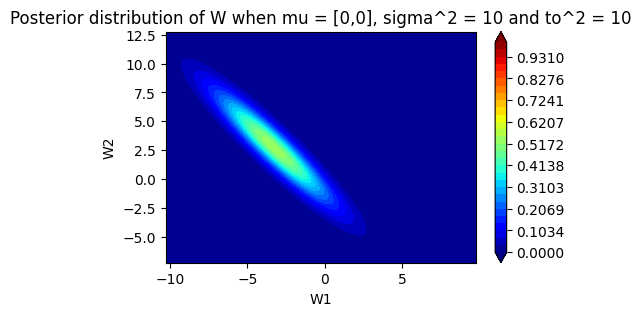

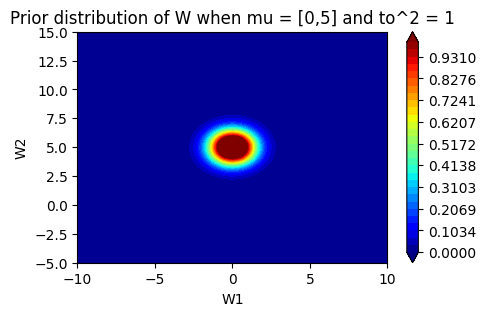

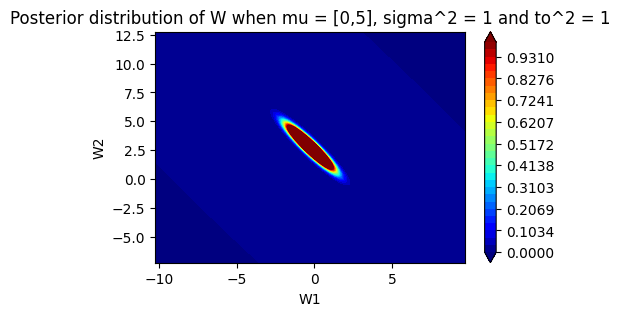

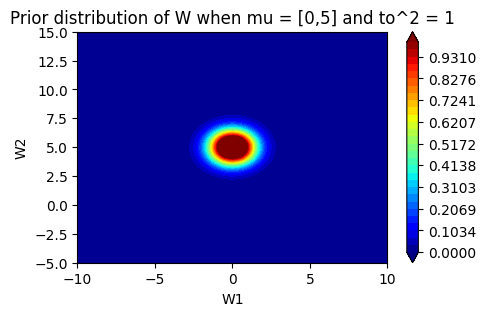

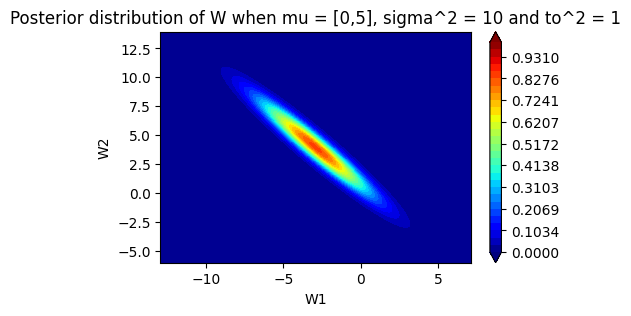

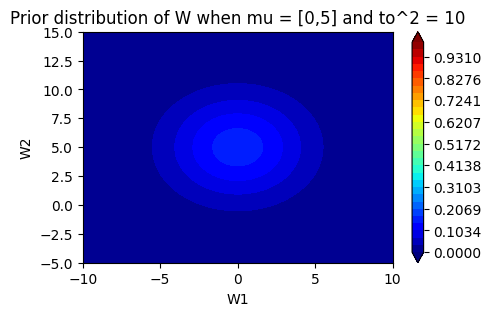

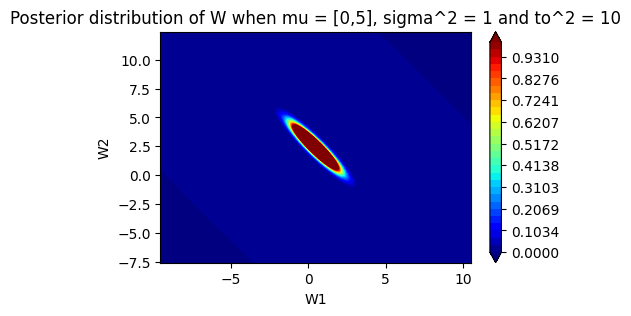

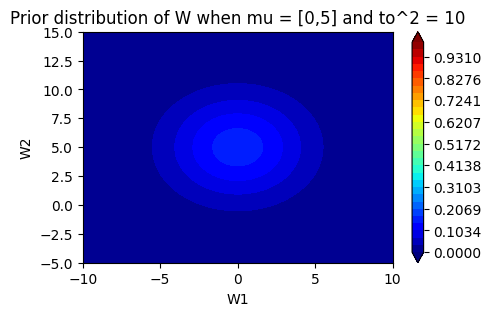

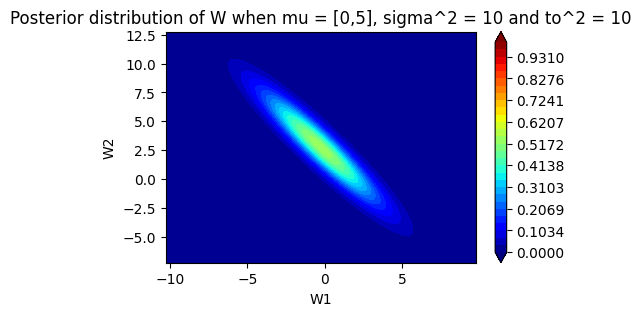

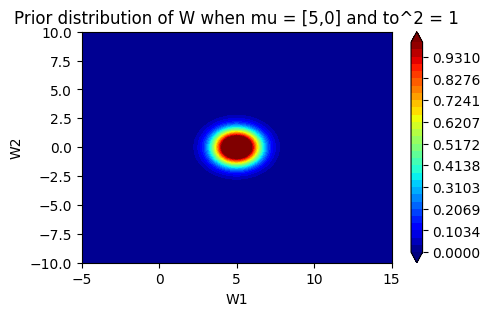

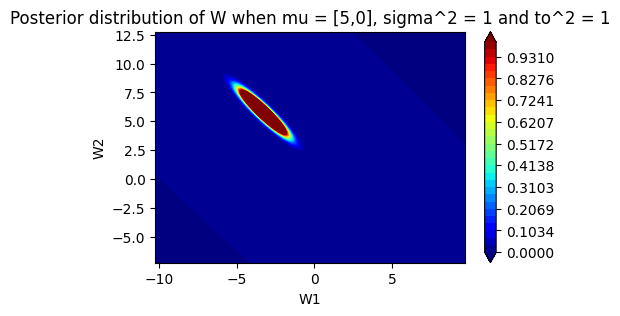

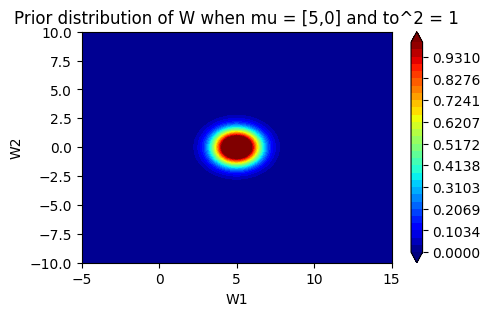

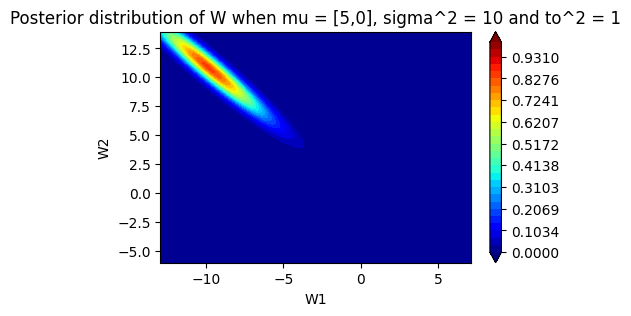

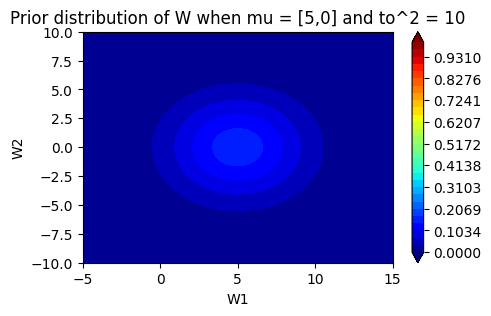

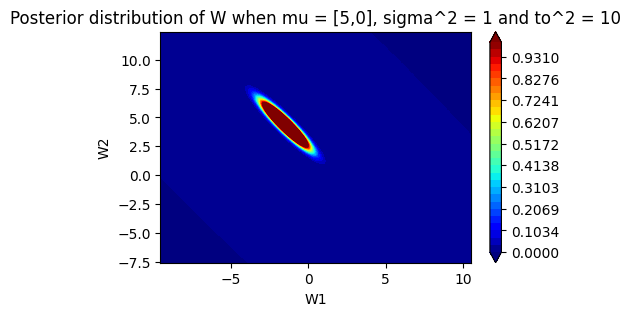

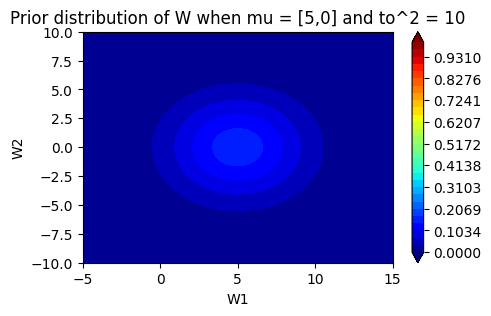

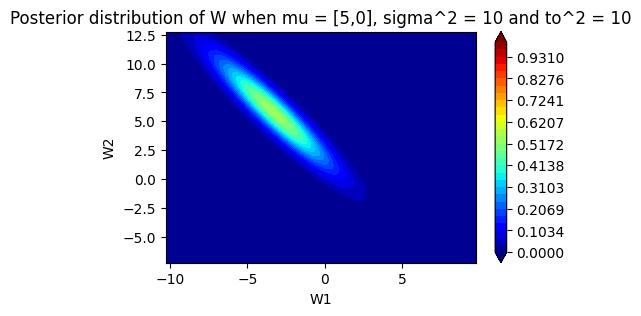

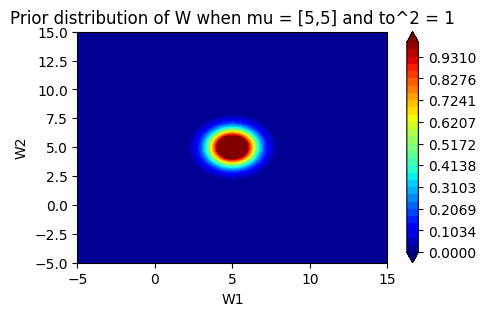

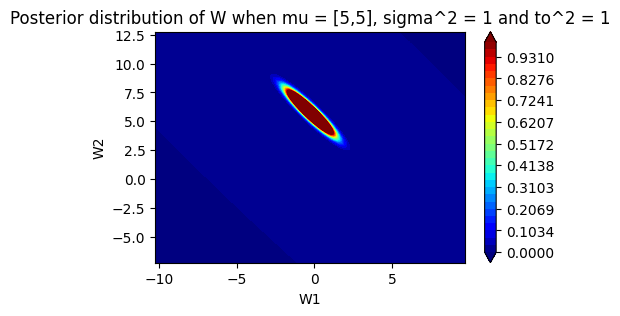

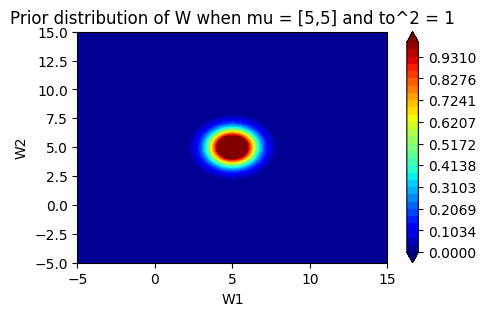

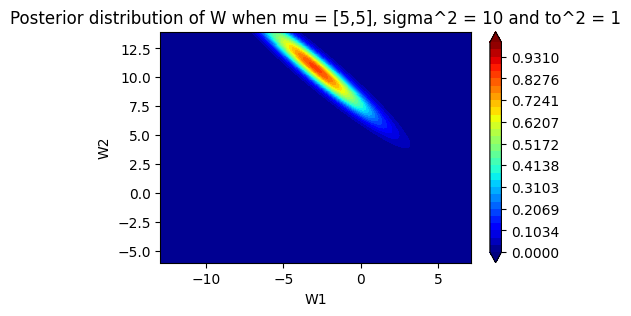

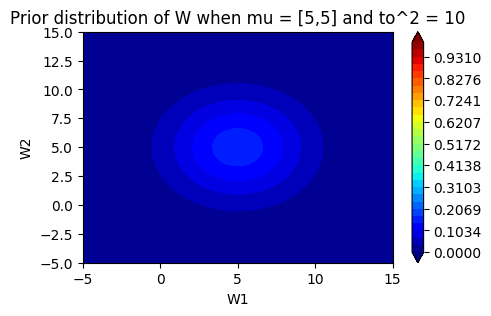

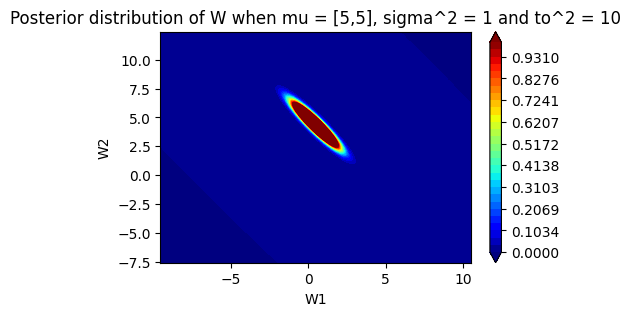

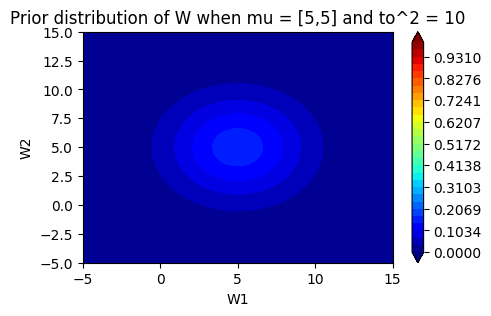

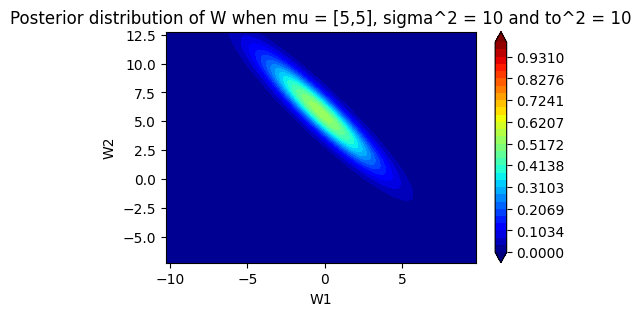

In [6]:
# Cell type : CodeWrite 

X=[[1,2],[2,2.1],[0.6,1.5],[1.1,0.9]]
Y=[5.1,6.1,4.2,2.9]

mu_1=[0,5]
mu_2=[0,5]
to_sq=[1,10]
sigma_sq=[1,10]
C=np.zeros((1000,1000))

for i in range(2):
  for j in range(2):
    for k in range(2):
      for l in range(2):
        
        W_1=np.linspace(-10+mu_1[i],10+mu_1[i],1000)
        W_2=np.linspace(-10+mu_2[j],10+mu_2[j],1000)

        A,B=np.meshgrid(W_1,W_2)

        covariance_inv_prior=1/to_sq[k]*np.eye(2)

        for i1 in range(1000):
          for j1 in range(1000):

            C[i1,j1] = np.sqrt(np.linalg.det(covariance_inv_prior))*np.exp(-np.matmul(np.matmul(np.transpose(np.array([W_1[i1]-mu_1[i], W_2[j1]-mu_2[j]])),covariance_inv_prior),np.array([W_1[i1]-mu_1[i], W_2[j1]-mu_2[j]]))/2)/2*np.pi

        plt.subplots(1,1,figsize=(5,3))
        plt.contourf(A,B,C,levels=np.linspace(0,1,30), cmap='jet', extend='both')
        plt.title('Prior distribution of W when mu = [{},{}] and to^2 = {}'.format(mu_1[i],mu_2[j],to_sq[k]))
        plt.colorbar()     
        plt.xlabel('W1')
        plt.ylabel('W2')
        plt.show()

        covariance_inv=np.matmul(np.transpose(X),X)/sigma_sq[l]+1/to_sq[k]
        
        mu=np.transpose(np.matmul(np.matmul(np.transpose(Y),X),np.linalg.inv(covariance_inv))/sigma_sq[l])

        W_1=np.linspace(-10+mu[0],10+mu[0],1000)
        W_2=np.linspace(-10+mu[1],10+mu[1],1000)

        A,B= np.meshgrid(W_1,W_2)

        for i1 in range(1000):
          for j1 in range(1000):

            C[i1,j1] = np.sqrt(np.linalg.det(covariance_inv))*np.exp(-np.matmul(np.matmul(np.transpose(np.array([W_1[i1]-mu[i], W_2[j1]-mu[j]])),covariance_inv),np.array([W_1[i1]-mu[i], W_2[j1]-mu[j]]))/2)/2*np.pi

        plt.subplots(1,1,figsize=(5,3))
        plt.contourf(A,B,C,levels=np.linspace(0,1,30), cmap='jet', extend='both')
        plt.title('Posterior distribution of W when mu = [{},{}], sigma^2 = {} and to^2 = {}'.format(mu_1[i],mu_2[j],sigma_sq[l], to_sq[k]))
        plt.colorbar()     
        plt.xlabel('W1')
        plt.ylabel('W2')
        plt.show()

** Cell type : TextWrite **

**Observations:** 

1. The posterior distribution is also a Gaussian distribution.
2. When $\tau^2$ is greater than $\sigma^2$, that is when our confidence on the correctness of the prior is low, the posterior distribution is quite different from the prior distribution, as it depends more strongly on the observed data.

**Cell type : TextRead**

# 5. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [4]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def linear_kernel(u, v):
    return u@v.T

def poly_kernel(u, v, kernel_param, free_param = 1):
    return (free_param + u@v.T)**kernel_param

def rbf_kernel(u, v, kernel_param, dim1, dim2):
    K = np.zeros([dim1,dim2])
    for i in range(dim1):
        for j in range(dim2):
            K[i,j] = np.exp(-kernel_param*np.linalg.norm(u[i]-v[j])**2)
    return K


def kernel_matrix(type, inputs):
    '''
    inputs: list of the form [X, X, kernel_param, dim1, dim2, free_param]
    '''
    if type == 'linear':
        return linear_kernel(inputs[0], inputs[1])
    elif type == 'poly':
        return poly_kernel(inputs[0], inputs[1], inputs[2], inputs[5])
    elif type == 'rbf':
        return rbf_kernel(inputs[0], inputs[1], inputs[2], inputs[3], inputs[4])

def sigmoid(u):
    return 1.0 / (1.0 + np.exp(-u))

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100, eta = 0.001):
    
    n, d = X.shape[0], X.shape[1]
    inputs_to_kernel_func = [X, X, kernel_param, n, n, 1]
    K = kernel_matrix(kernel, inputs_to_kernel_func)
    alpha = np.zeros(n)
    # print(X.shape)
    # print(Y.shape)
    # print(K.shape)
    # print(alpha.shape)
    # for i in range(num_iter_gd):
    #     # grad(risk wrt alpha) = $ \sum_{i = 1} ^{n} (\sigma(-y_{i} * \alpha^{T} * K_{:,i})*(-Y[j]*K[:,j]) + \lambda * K * \alpha) $
    #     # grad = summation_term + product_term
    #     # grad = sigmoid_term*derivative_term + product_term
    #     summation_term = 0
    #     for j in range(n):
    #         sigmoid_term = -Y[j]*np.dot(alpha.T,K[:,j])
    #         derivative_term = -Y[j]*K[:,j]
    #         summation_term += sigmoid(sigmoid_term)*derivative_term
    #     # print(summation_term.shape)
    #     # print(derivative_term.shape)
    #     product_term = reg_param*np.dot(K,alpha)
    #     grad = summation_term.reshape(-1,1) + product_term
    #     grad_norm = np.linalg.norm(grad)
    #     if grad_norm > 1:
    #         grad = grad/grad_norm 
    #     #update rule
    #     alpha = alpha - eta*grad
         
    # # print(X.shape)
    # # print(Y.shape)
    # # print(K.shape)
    # # print(alpha.shape)
    # #problem with alpha   

    # return alpha
    ### changed code to have one for loop and use einstein sum for faster calculations
    ### Initially getting results took around 50 minutes for each dataset
    ### Hence, this change was made
    # Flow
    # grad(risk wrt alpha) = $ \sum_{i = 1} ^{n} (\sigma(-y_{i} * \alpha^{T} * K_{:,i})*(-Y[j]*K[:,j]) + \lambda * K * \alpha) $
    # grad = summation_term + product_term
    # grad = sigmoid_term*derivative_term + product_term
    derivative_term = -Y*K
    # print(derivative_term.shape)
    for i in range(num_iter_gd):
        sigmoid_term = -Y*np.einsum('i, ij -> j', alpha, K)
        # print(sigmoid_term.shape)
        # sigmoid_term = -Y*sigmoid_term
        # print(sigmoid_term.shape)
        sigmoid_term = sigmoid(sigmoid_term)
        # print(sigmoid_term.shape)
        product_term = reg_param*np.einsum('ij, j -> i', K, alpha)
        # print(product_term.shape)
        grad = np.einsum('j, ij -> i', sigmoid_term, derivative_term) + product_term
        # print(grad.shape)
        grad_norm = np.linalg.norm(grad)
        # this is done because we don't really care much about updating 
        # alpha according to the value of the. gradient
        # we just want it to be updated towards the right direction
        if grad_norm > 1:
            grad = grad/grad_norm
        alpha = alpha - eta*grad
    return alpha

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    # pred = $ sign(w^T \phi(x)) = sign(\sum_{i = 1}\alpha_{i} K(x_{i}, x)) $
    n, m = train_X.shape[0], test_X.shape[0]
    # print(alpha.shape)
    # print(train_X.shape)
    # print(test_X.shape)
    inputs_to_kernel_func = [train_X, test_X, kernel_param, n, m, 1]
    K = kernel_matrix(kernel, inputs_to_kernel_func)
    # print(K.shape)
    # pred_Y = np.sign(alpha.T@K)
    pred_Y = np.einsum('i, ij->j', alpha, K)
    pred_Y = np.sign(pred_Y)
    # print(pred_Y.shape)
    # pred_Y = pred_Y.reshape(-1,1)
    # print(pred_Y.shape)
    return pred_Y

In [5]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 
def choose_hyperparams(X_train, Y_train, X_test, Y_test, kernel, num_iter_gd=100, eta = 0.001):
    regs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
    kernel_params_poly = [1, 2, 3, 4, 5]
    kernel_params_rbf = [1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 100]
    params = (0,1)
    err = 1
    dummy_linear_kernel_param = 1
    if kernel == 'linear':
        for reg in regs:
            alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg, dummy_linear_kernel_param, num_iter_gd, eta)
            Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel, dummy_linear_kernel_param)
            # print(Y_pred.shape)
            # print(Y_test.shape)
            test_err = np.sum(Y_pred != Y_test) / len(Y_test)
            if test_err < err:
                err = test_err
                params = (reg, 1)
        #     print(reg, test_err)
        # print(params, err)
        return params
    elif kernel == 'poly':
        for reg in regs:
            for param in kernel_params_poly:
                alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg, param, num_iter_gd, eta)
                Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel, param)
                test_err = np.sum(Y_pred != Y_test) / len(Y_test)
                if test_err < err:
                    err = test_err
                    params = (reg, param)
        #         print(reg, param, test_err)
        # print(params, err)
        return params
    elif kernel == 'rbf':
        for reg in regs:
            for param in kernel_params_rbf:
                alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg, param, num_iter_gd, eta)
                Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel, param)
                test_err = np.sum(Y_pred != Y_test) / len(Y_test)
                if test_err < err:
                    err = test_err
                    params = (reg, param)
        #         print(reg, param, test_err)
        # print(params, err)
        return params

def train_valid_split(X_train, Y_train, split = 0.8):
    indices = [i for i in range(len(X_train))]
    train_indices = np.random.choice(indices, size=round(len(indices) * split), replace = False)
    valid_indices = list(set(indices) - set(train_indices))
    X_tr = []
    Y_tr = []
    X_valid = []
    Y_valid = []
    for index in train_indices:
        X_tr.append(X_train[index])
        Y_tr.append(Y_train[index])
    for index in valid_indices:
        X_valid.append(X_train[index])
        Y_valid.append(Y_train[index])
    return np.array(X_tr), np.array(Y_tr), np.array(X_valid), np.array(Y_valid)

## flow
## 1. train and test loss for all combinations of hyperparams
## 2. train_valid_split
## 3. find best hyperparams
## 4. train and test loss for chosen hyperparams

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    #Y_train = np.vstack(Y_train)
    #Y_test = np.vstack(Y_test)
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic). 

**Observations:**

*dataset_A*: 

|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|Number of Iterations|Learning Rate|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Linear|0\.0001|-|0\.124|0\.133|300|0\.001|
|Polynomial|0\.0001|3|0\.013|0\.008|600|0\.001|
|RBF|0\.0001|100|0\.0|0\.002|300|0\.001|

- The dataset necessitates a decision boundary that's non-linear in nature, making the linear kernel significantly less effective compared to the alternative kernel options.
- The training error and test error are relatively minimal with the RBF kernel, primarily because this model is adept at capturing intricate non-linear decision boundaries.
- Upon observation with the polynomial kernel, it became evident that even-degree polynomials exhibited notably inferior performance compared to their odd-degree counterparts. This disparity arises from the boundary's resemblance to, or requirement for, an odd-function structure.

*dataset_B*:

|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|Number of Iterations|Learning Rate|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Linear|1\.0|-|0\.176|0\.202|300|0\.001|
|Polynomial|0\.0001|1|0\.175|0\.196|600|0\.001|
|RBF|0\.0001|0\.1|0\.173|0\.196|300|0\.001|

- Within this dataset, achieving the most effective separation between classes is attainable through a linear boundary, rendering all three kernels relatively equal in performance.
- Among the polynomial kernels, the most successful was often found to be of degree 1, while other polynomial degrees occasionally exhibited significantly inferior performance.
- Overall, optimization posed greater challenges due to the intermixing of data points from distinct classes, leading to the absence of a definitive "ideal" solution.

*dataset_C*:

|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|Number of Iterations|Learning Rate|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Linear|0\.0001|-|0\.074|0\.104|300|0\.001|
|Polynomial|0\.0001|3|0\.013|0\.071|300|0\.001|
|RBF|0\.0001|1|0\.0|0\.037|300|0\.001|

- Enhanced performance was observed with the utilization of non-linear decision boundaries, suggesting that the data does not adhere to linear separability within the 64-dimensional space.

*dataset_D*:

|Kernel|Regularization Term|Kernel Parameter|Train loss|Test Loss|Number of Iterations|Learning Rate|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Linear|0\.0001|-|0\.0175|0\.035|300|0\.001|
|Polynomial|0\.0001|2|0\.02|0\.041|300|0\.001|
|RBF|0\.0001|1|0\.0|0\.035|300|0\.001|

- The performance exhibited by the linear and polynomial kernels was analogous.  

Please note that these values might change as the training data was split into train and validation sets (80-20 split) without seeding. The chosen hyperparameters may hence be biased to the data achieved based on the split.

<Figure size 640x480 with 0 Axes>

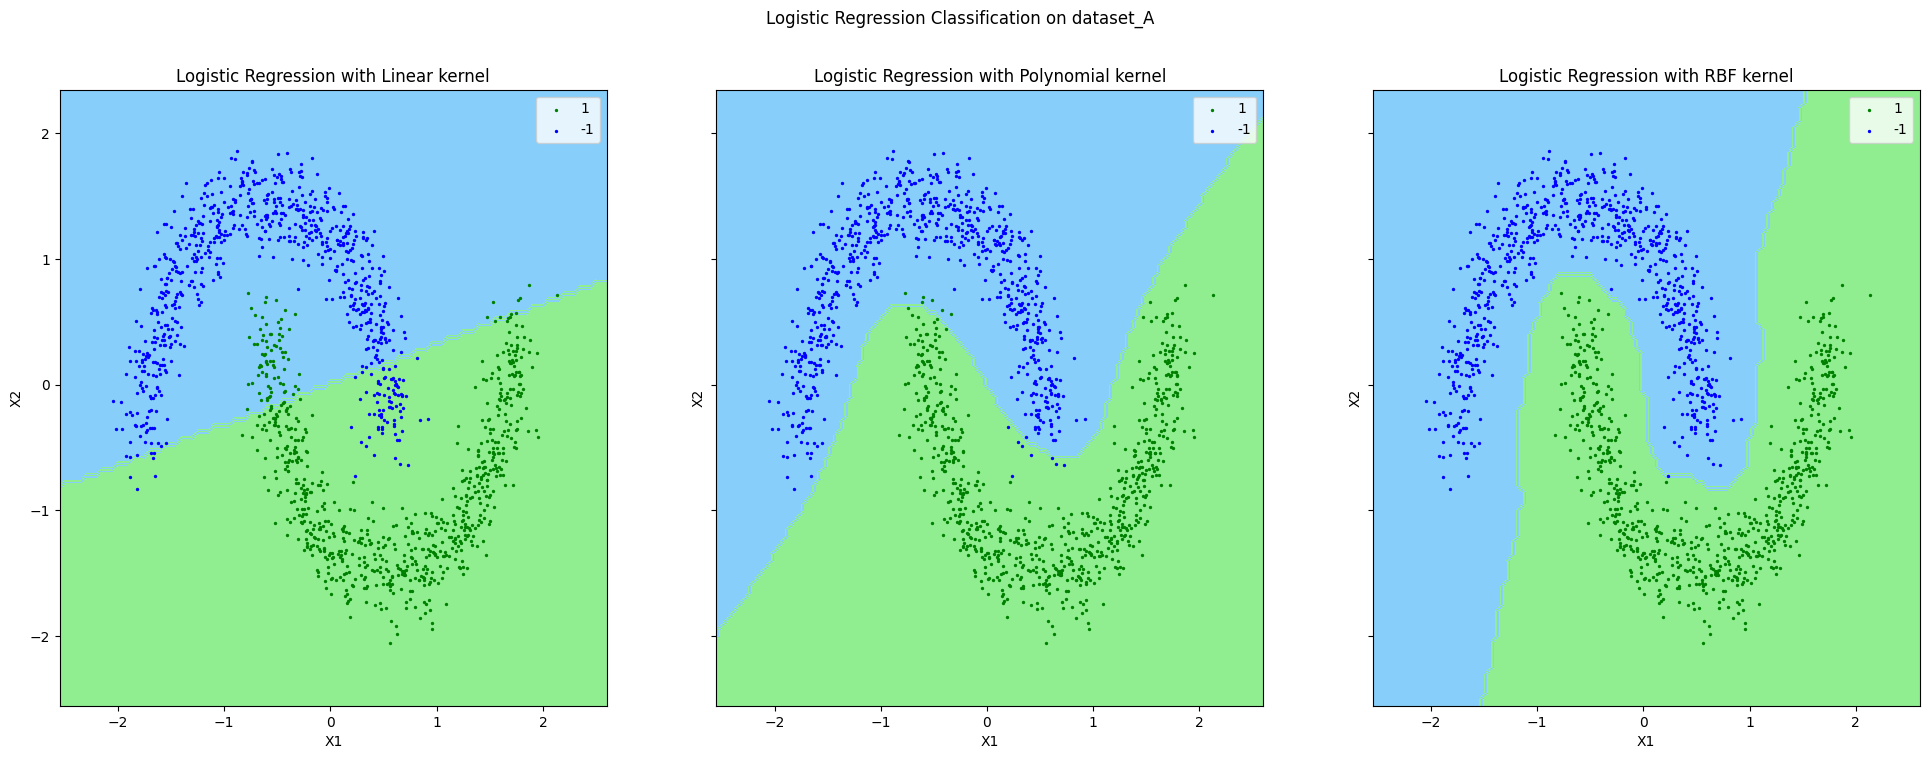

<Figure size 640x480 with 0 Axes>

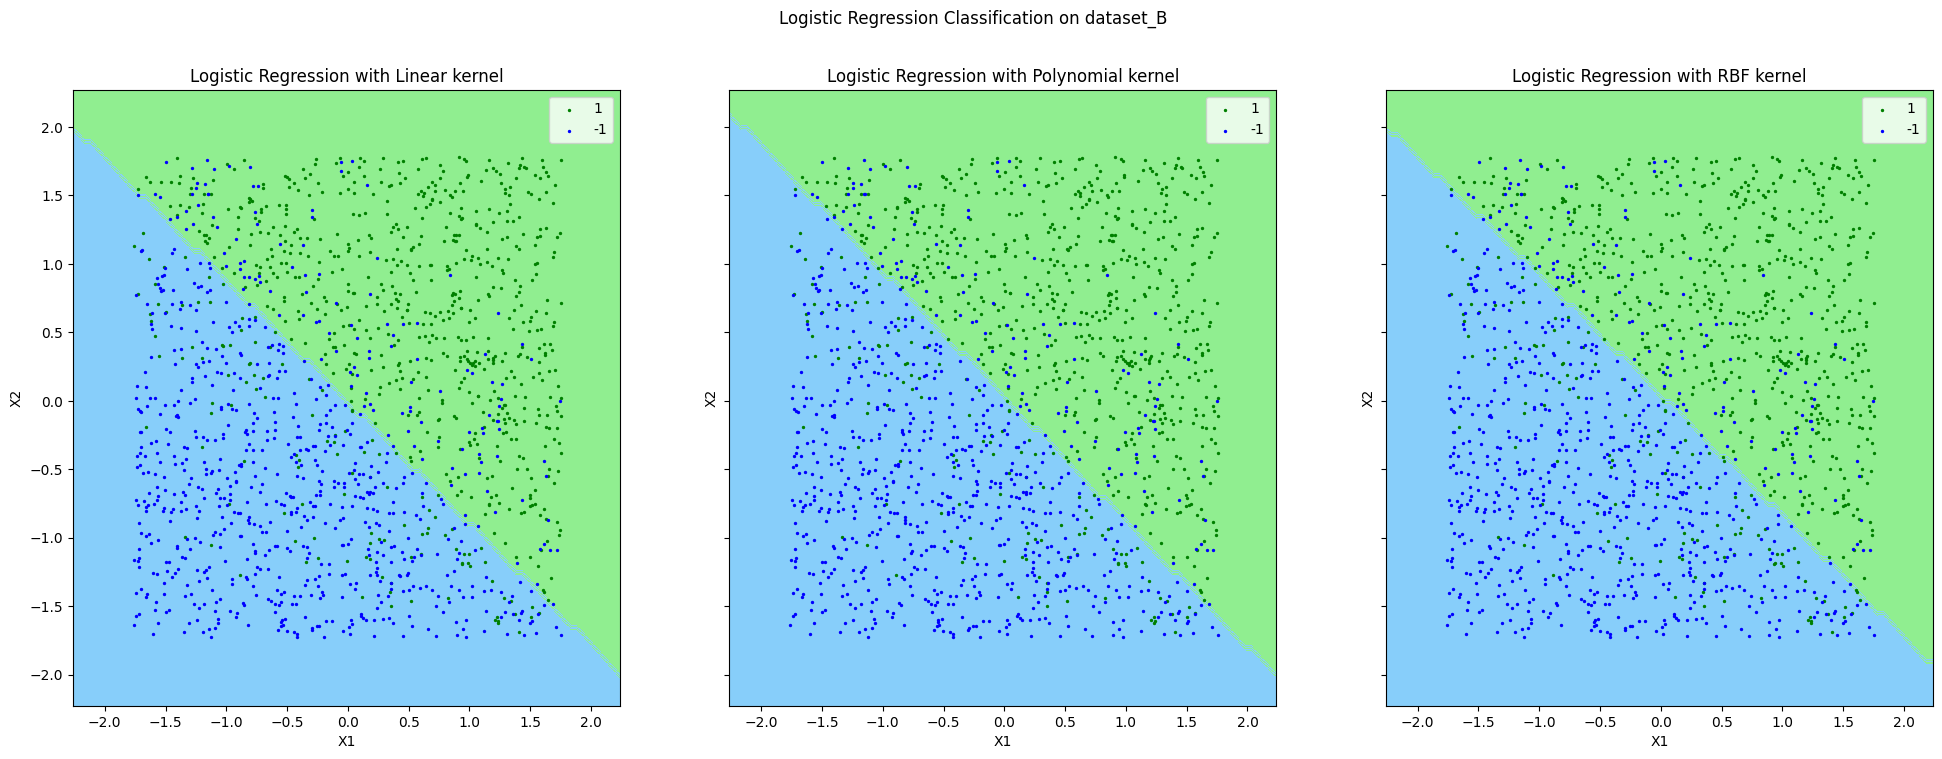

In [6]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
X_train, Y_train, X_test, Y_test = preprocess('dataset_A.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)

alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=0.0001, kernel_param=1, num_iter_gd=300)
pred_y_l = test_pred(alpha, X_train, Y_train, testing_set, kernel='linear',kernel_param=1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=0.0001, kernel_param=3, num_iter_gd=600)
pred_y_p = test_pred(alpha, X_train, Y_train, testing_set, kernel='poly',kernel_param=3)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=0.0001, kernel_param=100, num_iter_gd=300)
pred_y_r = test_pred(alpha, X_train, Y_train, testing_set, kernel='rbf',kernel_param=100)

plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(24,8))
f.suptitle('Logistic Regression Classification on dataset_A')
ax[0].contourf(X,Y,pred_y_l.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax[1].contourf(X,Y,pred_y_p.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax[2].contourf(X,Y,pred_y_r.reshape(X.shape), colors=['lightskyblue','lightgreen'])
crit = ['Linear', 'Polynomial', 'RBF']
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='g', label='1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='b',label='-1')
    a.set_title(f'Logistic Regression with {crit[i]} kernel')
    a.set_xlabel('X1')
    a.set_ylabel('X2')
    a.legend()
plt.show()

X_train, Y_train, X_test, Y_test = preprocess('dataset_B.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)

alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=1, kernel_param=1, num_iter_gd=300)
pred_y_l = test_pred(alpha, X_train, Y_train, testing_set, kernel='linear',kernel_param=1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=0.0001, kernel_param=1, num_iter_gd=600)
pred_y_p = test_pred(alpha, X_train, Y_train, testing_set, kernel='poly',kernel_param=1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=0.0001, kernel_param=0.1, num_iter_gd=300)
pred_y_r = test_pred(alpha, X_train, Y_train, testing_set, kernel='rbf',kernel_param=0.1)

plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(24,8))
f.suptitle('Logistic Regression Classification on dataset_B')
ax[0].contourf(X,Y,pred_y_l.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax[1].contourf(X,Y,pred_y_p.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax[2].contourf(X,Y,pred_y_r.reshape(X.shape), colors=['lightskyblue','lightgreen'])
crit = ['Linear', 'Polynomial', 'RBF']
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='g', label='1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='b',label='-1')
    a.set_title(f'Logistic Regression with {crit[i]} kernel')
    a.set_xlabel('X1')
    a.set_ylabel('X2')
    a.legend()
plt.show()

**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [7]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)
def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y. 
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    tree ={}
    init_val = -1
    tree[0] = [init_val]*3
    split_node_dec(tree, 0, X, Y, 0, num_nodes_stop, criterion)
    return tree

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    n = test_X.shape[0]
    Y_pred = np.zeros(n)
    for i in range(n):
        Y_pred[i] = pred_class(tree, 0, test_X[i])
    return Y_pred
    
neg = 0
pos = 0

def split_node_dec(tree, node_pos, X, Y, depth, num_nodes_stop=1, criterion = 'accuracy', stop_depth = 1e7):
    global neg, pos
    n,d = X.shape
    total_neg = np.sum((Y==-1))
    total_pos = np.sum((Y==1))
    one_class = False
    if total_pos == 0 or total_pos == n:
        one_class = True
    if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
        if total_pos > total_neg:
            class_pred = 1
        else:
            class_pred = -1
        tree[node_pos] = [-1,-1, class_pred]
        return

    neg = total_neg
    pos = total_pos
    best_feat = 0
    best_thresh = 0
    best_acc = -np.inf
    
    for feat in range(d):
        ids = X[:,feat].argsort()
        X = X[ids]
        Y = Y[ids]
        min_feat = X[0][feat]
        max_feat = X[-1][feat]
        num_pts  = 11
        iter = max_feat - min_feat
        iter = iter/num_pts
        for pt in range(1, num_pts):
            thresh = min_feat + pt*iter
            pos_l = 0
            left = 0
            for sample in range(n):
                if X[sample][feat] <= thresh:
                    left+=1
                    if Y[sample]>0:
                        pos_l+=1
            pos_r = total_pos - pos_l
            right = n - left
            dec = split_dec(criterion, pos_l, left, pos_r, right)
            if dec >= best_acc:
                best_acc = dec
                best_feat = feat
                best_thresh = thresh
    X_left = X[X[:, best_feat] <= best_thresh]
    Y_left = Y[X[:, best_feat] <= best_thresh]
    X_right = X[X[:, best_feat] > best_thresh]
    Y_right = Y[X[:, best_feat] > best_thresh]
    tree[node_pos] = [best_feat, best_thresh, 0]
    split_node_dec(tree, 2*node_pos+1, X_left, Y_left, depth+1, num_nodes_stop, criterion, stop_depth)
    split_node_dec(tree, 2*node_pos+2, X_right, Y_right, depth+1, num_nodes_stop, criterion, stop_depth)
    return

def split_dec(criterion, pos_l, left, pos_r, right):
    if criterion == 'accuracy':
        val = (pos_l + right - pos_r)/(left+right)
        return max(val, 1-val)
    elif criterion == 'entropy':
        p_l = left/(left+right)
        h_l = h_func(pos_l/(left+1e-40))
        p_r = 1 - p_l
        h_r = h_func(pos_r/(right+1e-40))
        return (p_l*h_l + p_r*h_r)

def h_func(x):
    if x == 0 or x == 1:
        return 0
    return x*np.log2(x) + (1-x)*np.log2(1-x)

def pred_class(tree, node_pos, sample):
    if tree[node_pos][0] == -1:
        return tree[node_pos][2]
    loc = tree[node_pos][0]
    thresh = tree[node_pos][1]
    if sample[loc] <= thresh:
        return pred_class(tree, 2*node_pos+1, sample)
    else:
        return pred_class(tree, 2*node_pos+2, sample)

In [8]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
def train_valid_split(X_train, Y_train, split = 0.8):
    indices = [i for i in range(len(X_train))]
    train_indices = np.random.choice(indices, size=round(len(indices) * split), replace = False)
    valid_indices = list(set(indices) - set(train_indices))
    X_tr = []
    Y_tr = []
    X_valid = []
    Y_valid = []
    for index in train_indices:
        X_tr.append(X_train[index])
        Y_tr.append(Y_train[index])
    for index in valid_indices:
        X_valid.append(X_train[index])
        Y_valid.append(Y_train[index])
    return np.array(X_tr), np.array(Y_tr), np.array(X_valid), np.array(Y_valid)

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    #Y_train = np.vstack(Y_train)
    #Y_test = np.vstack(Y_test)
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)

def choose_hyperparam(X_train, Y_train, X_test, Y_test, criterion):
    node_stop = [1, 2, 4, 8, 16, 32, 64, 128, 256]
    err = 1
    best_num_nodes_stop = 0
    for ns in node_stop:
        clf = train_decision_tree(X_train, Y_train, ns, criterion)
        Y_pred = eval_decision_tree(clf, X_test)
        test_err = np.sum(Y_pred != Y_test) / len(Y_pred)
        if test_err < err:
            err = test_err
            best_num_nodes_stop = ns
    return best_num_nodes_stop

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).

**Observations**

1. The minimal training error achieved by setting num_nodes_stop to 1, regardless of the dataset, is a fundamental trait of decision trees. This configuration ensures a perfect fit to the training data, resulting in a training error of zero. However, this tendency often leads to suboptimal performance on the validation set due to overfitting, where the model fails to generalize well beyond the training data.
2. dataset_B exhibits significant overlap between positive and negative points, posing a challenge for effective separation without a well-crafted feature mapping. Since decision trees lack such sophisticated feature transformations, they struggle to achieve low error rates on this dataset.
3. Notably, the optimal separation for dataset_B seems to be a diagonal boundary, a pattern that decision trees, limited to vertical or horizontal boundaries, cannot fully capture. This limitation arises from the discrete nature of decision thresholds in trees, making it impossible to precisely model smooth diagonal separators. Consequently, decision trees tend to underperform relative to other classifiers that can accommodate such boundary shapes, like those employing hyperplanes.
4. Drawing conclusions about datasets_C and dataset_D proves challenging due to their high-dimensional nature, precluding straightforward visualization. Consequently, making definitive claims about the performance of decision trees on these datasets requires a deeper analysis beyond visual inspection.

*Accuracy criterion:*

Dataset | Stopping node size | Train zero-one error(%) | Test zero-one error(%)
--- |--- |--- |---
dataset_A | 1 | 0 | 3.8
dataset_B | 16 | 15.8 | 23.4
dataset_C | 64 | 10.73 | 13.8
dataset_D | 16 | 4.25 | 7.7

*Entropy criterion:*

Dataset | Stopping node size | Train zero-one error(%) | Test zero-one error(%)
--- |--- |--- |---
dataset_A |1| 0 | 0.4
dataset_B | 32| 14.73 | 22.6
dataset_C | 1|0 | 8.42
dataset_D | 1|0  | 8.87

The best stopping node size was chosen by considering the least train zero-one error for both accuracy and entropy criterion.

Please note that these values might change as the training data was split into train and validation sets (80-20 split) without seeding. The chosen hyperparameters may hence be biased to the data achieved based on the split.

<Figure size 640x480 with 0 Axes>

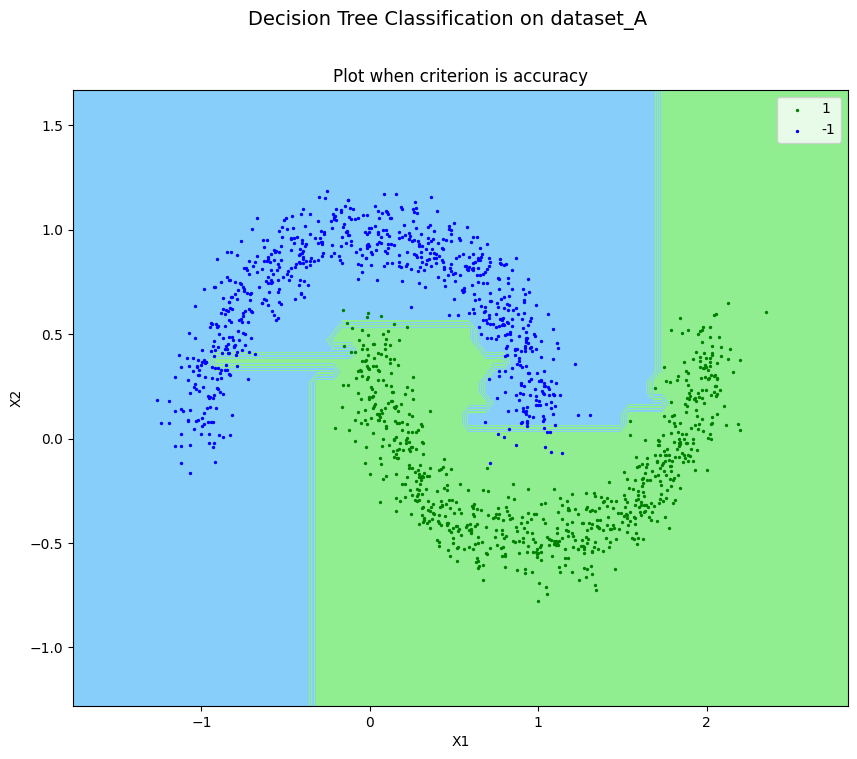

<Figure size 640x480 with 0 Axes>

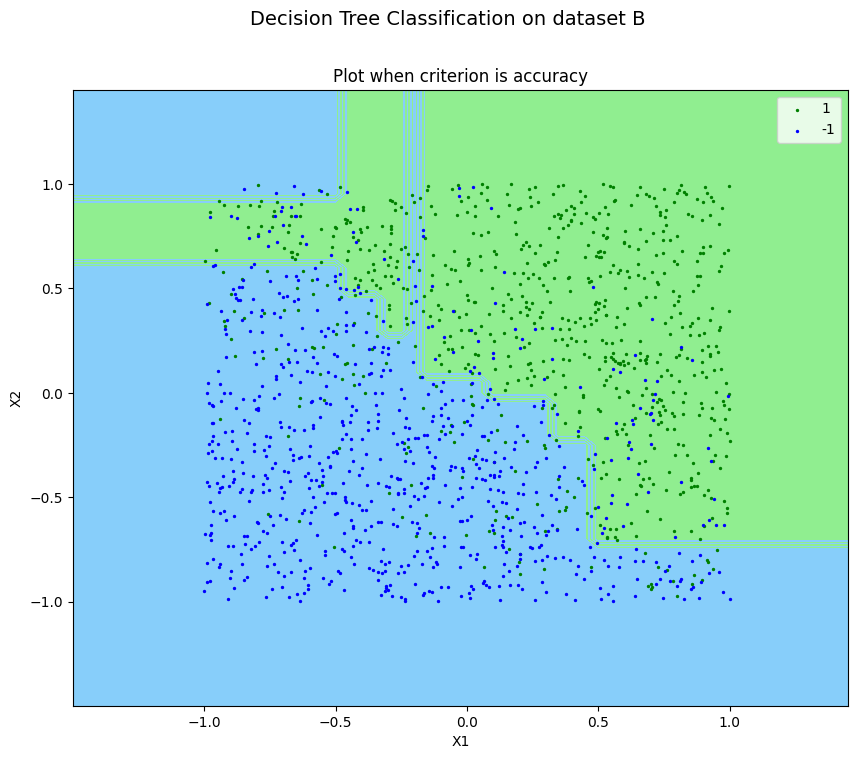

In [30]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

d=np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = d['arr_0'], d['arr_1'], d['arr_2'], d['arr_3']
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
clf = train_decision_tree(X_train, Y_train, num_nodes_stop=4, criterion='accuracy')
predA = eval_decision_tree(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,1,sharex=False,sharey=True,figsize=(10,8))
f.suptitle('Decision Tree Classification on dataset_A', size=14)
ax.contourf(X,Y,predA.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='g', label='1')
ax.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='b',label='-1')
ax.set_title(f'Plot when criterion is accuracy')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

d1=np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = d1['arr_0'], d1['arr_1'], d1['arr_2'], d1['arr_3']
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
clf = train_decision_tree(X_train, Y_train, num_nodes_stop=32, criterion='accuracy')
predB = eval_decision_tree(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,1,sharex=False,sharey=True,figsize=(10,8))
f.suptitle('Decision Tree Classification on dataset B', size=14)
ax.contourf(X,Y,predB.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='g', label='1')
ax.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='b',label='-1')
ax.set_title(f'Plot when criterion is accuracy')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [23]:
# CodeWrite cell
# Write Random Forest classifier. 
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. 
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    n,d = X.shape
    rf = []
    for i in range(num_trees):
        frac_data = np.sort(np.random.choice(range(n), int(n*a), replace = False))
        rf.append(train_dt_rf(X[frac_data], Y[frac_data], num_nodes_stop, criterion, b))
    return rf
    

def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (hhowever you want to store it), and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    m, dim = test_X.shape
    Y_pred = np.zeros(m)
    for tree in random_forest:
        Y_pred = Y_pred + eval_dt_rf(tree, test_X)
    return np.sign(Y_pred)

def train_dt_rf(X, Y, num_nodes_stop, criterion, b):
    tree = {}
    init_val = -1
    tree[0] = [init_val]*3
    split_node_dec_rf(tree, 0, X, Y, 0, b, num_nodes_stop, criterion)
    return tree

def eval_dt_rf(tree, test_X):
    n = test_X.shape[0]
    Y = np.zeros(n)
    for i in range(n):
        Y[i] = pred_class_rf(tree, 0, test_X[i])
    return Y


def pred_class_rf(tree, node_pos, sample):
    if tree[node_pos][0] == -1:
        return tree[node_pos][2]
    loc = tree[node_pos][0]
    thresh = tree[node_pos][1]
    if sample[loc] <= thresh:
        return pred_class(tree, 2*node_pos+1, sample)
    else:
        return pred_class(tree, 2*node_pos+2, sample)


neg = 0
pos = 0

def split_node_dec_rf(tree, node_pos, X, Y, depth, b, num_nodes_stop=1, criterion = 'accuracy', stop_depth = 1e7):
    global neg, pos
    n,d = X.shape
    total_neg = np.sum((Y==-1))
    total_pos = np.sum((Y==1))
    one_class = False
    if total_pos == 0 or total_pos == n:
        one_class = True
    if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
        if total_pos > total_neg:
            class_pred = 1
        else:
            class_pred = -1
        tree[node_pos] = [-1,-1, class_pred]
        return

    neg = total_neg
    pos = total_pos
    best_feat = 0
    best_thresh = 0
    best_acc = -np.inf
    feats = np.sort(np.random.choice(range(d), int(d*b), replace = False))
    for feat in feats:
        ids = X[:,feat].argsort()
        X = X[ids]
        Y = Y[ids]
        min_feat = X[0][feat]
        max_feat = X[-1][feat]
        ### check here
        num_pts  = 11
        iter = max_feat - min_feat
        iter = iter/num_pts
        for pt in range(1, num_pts):
            thresh = min_feat + pt*iter
            pos_l = 0
            left = 0
            for sample in range(n):
                if X[sample][feat] <= thresh:
                    left+=1
                    if Y[sample]>0:
                        pos_l+=1
            pos_r = total_pos - pos_l
            right = n - left
            dec = split_dec_rf(criterion, pos_l, left, pos_r, right)
            if dec >= best_acc:
                best_acc = dec
                best_feat = feat
                best_thresh = thresh
    X_left = X[X[:, best_feat] <= best_thresh]
    Y_left = Y[X[:, best_feat] <= best_thresh]
    X_right = X[X[:, best_feat] > best_thresh]
    Y_right = Y[X[:, best_feat] > best_thresh]
    tree[node_pos] = [best_feat, best_thresh, 0]
    split_node_dec_rf(tree, 2*node_pos+1, X_left, Y_left, depth+1, b, num_nodes_stop, criterion, stop_depth)
    split_node_dec_rf(tree, 2*node_pos+2, X_right, Y_right, depth+1, b, num_nodes_stop, criterion, stop_depth)
    return

def split_dec_rf(criterion, pos_l, left, pos_r, right):
    if criterion == 'accuracy':
        val = (pos_l + right - pos_r)/(left+right)
        return max(val, 1-val)
    elif criterion == 'entropy':
        p_l = left/(left+right)
        h_l = h_func(pos_l/(left+1e-40))
        p_r = 1 - p_l
        h_r = h_func(pos_r/(right+1e-40))
        return (p_l*h_l + p_r*h_r)

def h_func(x):
    if x == 0 or x == 1:
        return 0
    return x*np.log2(x) + (1-x)*np.log2(1-x)

In [24]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
def train_valid_split(X_train, Y_train, split = 0.8):
    indices = [i for i in range(len(X_train))]
    train_indices = np.random.choice(indices, size=round(len(indices) * split), replace = False)
    valid_indices = list(set(indices) - set(train_indices))
    X_tr = []
    Y_tr = []
    X_valid = []
    Y_valid = []
    for index in train_indices:
        X_tr.append(X_train[index])
        Y_tr.append(Y_train[index])
    for index in valid_indices:
        X_valid.append(X_train[index])
        Y_valid.append(Y_train[index])
    return np.array(X_tr), np.array(Y_tr), np.array(X_valid), np.array(Y_valid)

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    #Y_train = np.vstack(Y_train)
    #Y_test = np.vstack(Y_test)
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)

def choose_hyperparam(X_train, Y_train, X_test, Y_test, criterion):
    num_trees = [5, 10, 20, 30, 40, 50, 60, 70, 80]
    err = 1
    best_num_trees = 0
    for nt in num_trees:
        clf = train_random_forest(X_train, Y_train, nt, 1, criterion)
        Y_pred = eval_random_forest(clf, X_test)
        test_err = np.sum(Y_pred != Y_test) / len(Y_pred)
        if test_err < err:
            err = test_err
            best_num_trees = nt
    return best_num_trees

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

**Observations:**

1. Low training errors are observed as we have set num_node_size = 1.
2. As with decision trees, random forests trained on entropy perform better than the ones trained on accuracy.
3. Random forests outperform decision trees across almost all datasets and criteria. 
4. Under the entropy criterion, dataset A needs the least number of trees to produce good results This might be due to the fact that a few linear boundaries can be easily used to separate dataset A. Hence, a small number of trees can do the job of classifying points in dataset A effectively.
5. The difference between the train and test errors in Dataset B is extremely large. The number of trees is also quite large. As a result, significant overfitting can be concluded.
6. With the entropy criterion, there is a significant reduction in test error from decision trees to random forests in Datasets C and D, even though the train errors are comparable. This means that bagging and random selection have improved the classifier's generalizability.
7. When we only use one tree, the training and validation errors are the highest. This is to be expected because the tree, having only been trained on half the data and half the set of available features, will neither fit the data well nor generalise to previously unseen data. 

*Accuracy criterion:*

Dataset | Number of Trees | Train zero-one error(%) | Test zero-one error(%)
--- |--- |--- |---
dataset_A | 40 | 0 | 0.6
dataset_B | 80 | 2.33 | 21.6
dataset_C | 50 | 7 | 12.46
dataset_D | 20 | 0.5 | 3.55

*Entropy criterion:*

Dataset | Number of Trees | Train zero-one error(%) | Test zero-one error(%)
--- |--- |--- |---
dataset_A |70| 0 | 0.2
dataset_B | 80| 2 | 20.4
dataset_C | 70| 0 | 6.06
dataset_D | 40|0.25 | 2.37

The best number of trees was chosen by considering the least train zero-one error for both accuracy and entropy criterion.

Please note that these values might change as the training data was split into train and validation sets (80-20 split) without seeding. The chosen hyperparameters may hence be biased to the data achieved based on the split.


<Figure size 640x480 with 0 Axes>

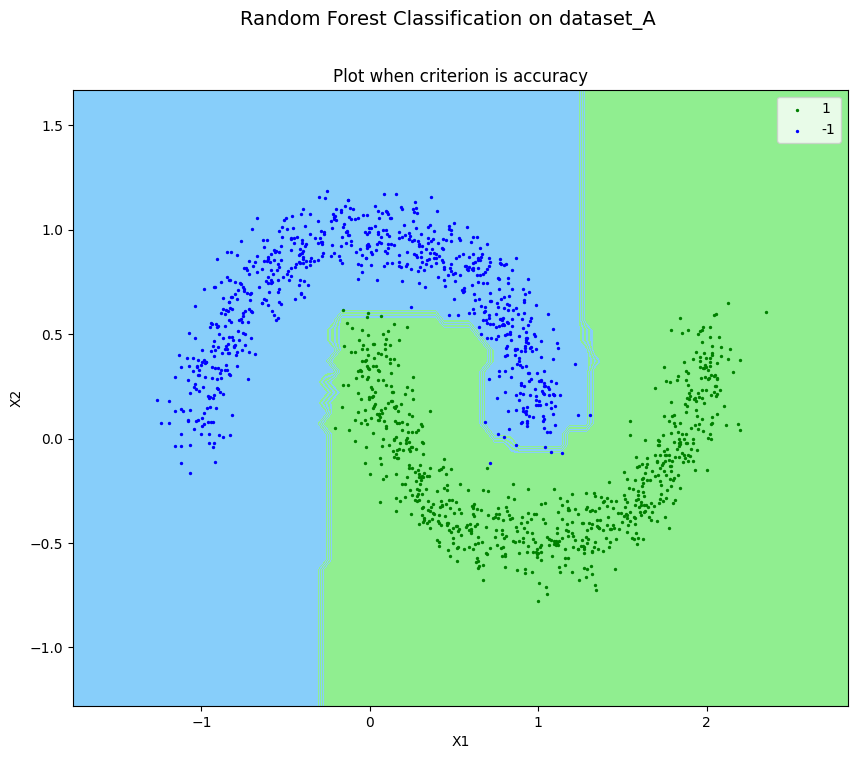

<Figure size 640x480 with 0 Axes>

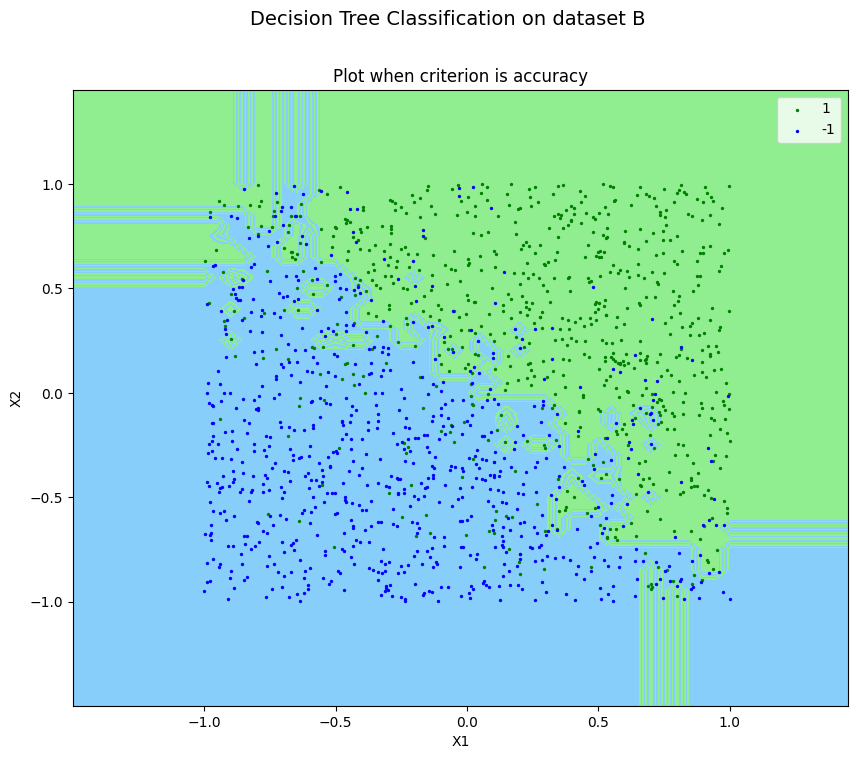

In [31]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

d=np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = d['arr_0'], d['arr_1'], d['arr_2'], d['arr_3']
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
clf = train_random_forest(X_train, Y_train, num_trees = 30, num_nodes_stop = 1, criterion='accuracy')
predA = eval_random_forest(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,1,sharex=False,sharey=True,figsize=(10,8))
f.suptitle('Random Forest Classification on dataset_A', size=14)
ax.contourf(X,Y,predA.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='g', label='1')
ax.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='b',label='-1')
ax.set_title(f'Plot when criterion is accuracy')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

d1=np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = d1['arr_0'], d1['arr_1'], d1['arr_2'], d1['arr_3']
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
clf = train_random_forest(X_train, Y_train, num_trees = 50, num_nodes_stop = 1, criterion='accuracy')
predB = eval_random_forest(clf, testing_set)

plt.figure(0)
f, ax = plt.subplots(1,1,sharex=False,sharey=True,figsize=(10,8))
f.suptitle('Decision Tree Classification on dataset B', size=14)
ax.contourf(X,Y,predB.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='g', label='1')
ax.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='b',label='-1')
ax.set_title(f'Plot when criterion is accuracy')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.show()

**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [7]:
# Codewrite cell
# Write code to run here (no plotting)
neg = 0
pos = 0
def split_node_dec_ada(tree, node_pos, X, Y, W, depth, num_nodes_stop = 1, criterion = 'accuracy', stop_depth = 1e7):
    global neg, pos
    n = int(np.sum(W))
    n_total, d = X.shape
    total_pos = int(np.sum(W[(Y == 1)]))
    total_neg = int(np.sum(W[(Y == -1)]))
    one_class = False
    if total_pos == 0 or total_pos == n:
        one_class = True
    # print(n)
    # print(num_nodes_stop)
    # print(depth)
    # print(stop_depth)
    # print(pos)
    # print(total_pos)
    # print(neg)
    # print(total_neg)
    if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
        if total_pos > total_neg:
            class_pred = 1
        else:
            class_pred = -1
        tree[node_pos] = [-1,-1, class_pred]
        return

    neg = total_neg
    pos = total_pos
    best_feat = 0
    best_thresh = 0
    best_acc = -np.inf
    for feat in range(d):
        ids = X[:, feat].argsort()
        X = X[ids]
        Y = Y[ids]
        W = W[ids]
        min_feat = X[0][feat]
        max_feat = X[-1][feat]
        num_pts  = 11
        iter = max_feat - min_feat
        iter = iter/num_pts
        for pt in range(1, num_pts):
            thresh = min_feat + pt*iter
            pos_l = 0
            left = 0
            for sample in range(n_total):
                if X[sample][feat] <= thresh:
                    left += (W[sample])
                    if Y[sample] > 0:
                        pos_l += (W[sample])
            pos_r = total_pos - pos_l
            right = n - left
            dec = split_dec_ada(criterion, pos_l, left, pos_r, right)
            if dec >= best_acc:
                best_acc = dec
                best_feat = feat
                best_thresh = thresh
    ind = (X[:, best_feat] <= best_thresh)
    X_left = X[ind]
    Y_left = Y[ind]
    W_left = W[ind]
    ind = (X[:, best_feat] > best_thresh)
    X_right = X[ind]
    Y_right = Y[ind]
    W_right = W[ind]
    tree[node_pos] = [best_feat, best_thresh, 0]
    split_node_dec_ada(tree, 2*node_pos+1, X_left, Y_left, W_left, depth+1, num_nodes_stop, criterion, stop_depth)
    split_node_dec_ada(tree, 2*node_pos+2, X_right, Y_right, W_right, depth+1, num_nodes_stop, criterion, stop_depth)
    return

def split_dec_ada(criterion, pos_l, left, pos_r, right):
    if criterion == 'accuracy':
        val = (pos_l + right - pos_r)/(left+right)
        return max(val, 1-val)
    elif criterion == 'entropy':
        p_l = left/(left+right)
        h_l = h_func(pos_l/(left+1e-40))
        p_r = 1 - p_l
        h_r = h_func(pos_r/(right+1e-40))
        return (p_l*h_l + p_r*h_r)

def h_func(x):
    if x == 0 or x == 1:
        return 0
    return x*np.log2(x) + (1-x)*np.log2(1-x)

def weak_learner(X_train, Y_train, X_test, W, depth):
  #print(3, depth)
  tree = train_dt_depth(X_train,Y_train, W, depth)
  pred = eval_decision_tree(tree, X_test)
  return pred,tree

def train_dt_depth(X, Y, W, depth, criterion='accuracy'):
    #print(4, depth)
    tree = {}
    init_val = -1
    tree[0] = [init_val]*3
    split_node_dec_ada(tree, 0, X, Y, W, 0, 1 , criterion, depth)
    return tree

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    n = test_X.shape[0]
    Y_pred = np.zeros(n)
    for i in range(n):
        Y_pred[i] = pred_class(tree, 0, test_X[i])
    return Y_pred

def adaboost(X, Y, depth):
  n = X.shape[0]
  W = np.ones(n)
  beta = np.zeros(50)
  learner = {}
  #print(2, depth)
  for i in range(50) :
    Y_pred, learner[i] = weak_learner(X, Y, X, W, depth)
    L = abs(Y-Y_pred)/2
    gamma = 1/2 - (W @ L.T)/(np.sum(W) + 1e-50)
    beta[i] = (0.5 + gamma)/(0.5 - gamma + 1e-50)
    W = [w*(beta[i]**int(L[j])) for j,w in enumerate(W)]
    W = np.array(W)
  return np.log(beta), learner

def pred_class(tree, node_pos, sample):
    if tree[node_pos][0] == -1:
        return tree[node_pos][2]
    loc = tree[node_pos][0]
    thresh = tree[node_pos][1]
    if sample[loc] <= thresh:
        return pred_class(tree, 2*node_pos+1, sample)
    else:
        return pred_class(tree, 2*node_pos+2, sample)

def run_ada_iter(beta, learner, X_test):
    '''
    To be used for plotting loss
    '''
    m = X_test.shape[0]
    n_iter_tot = len(learner)
    preds = []
    for n in range(n_iter_tot) :
        pred = np.zeros(m)
        for j in range(m) :
            prediction = np.array([pred_class(learner[i],0,X_test[j]) for i in range(n+1)])
            pred[j] = prediction@beta[:n+1].T
        pred = np.sign(pred)
        preds.append(pred)
    return preds

def run_ada(beta, learner, X_test):
    '''
    To be used for plotting the weak learners
    '''
    m = X_test.shape[0]
    n_iter_tot = len(learner)
    pred = np.zeros(m)
    for j in range(m) :
        prediction = np.array([pred_class(learner[i], 0, X_test[j]) for i in range(n_iter_tot)])
        pred[j] = prediction@beta[:n_iter_tot+1].T
    pred = np.sign(pred)
    return pred

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    #Y_train = np.vstack(Y_train)
    #Y_test = np.vstack(Y_test)
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)

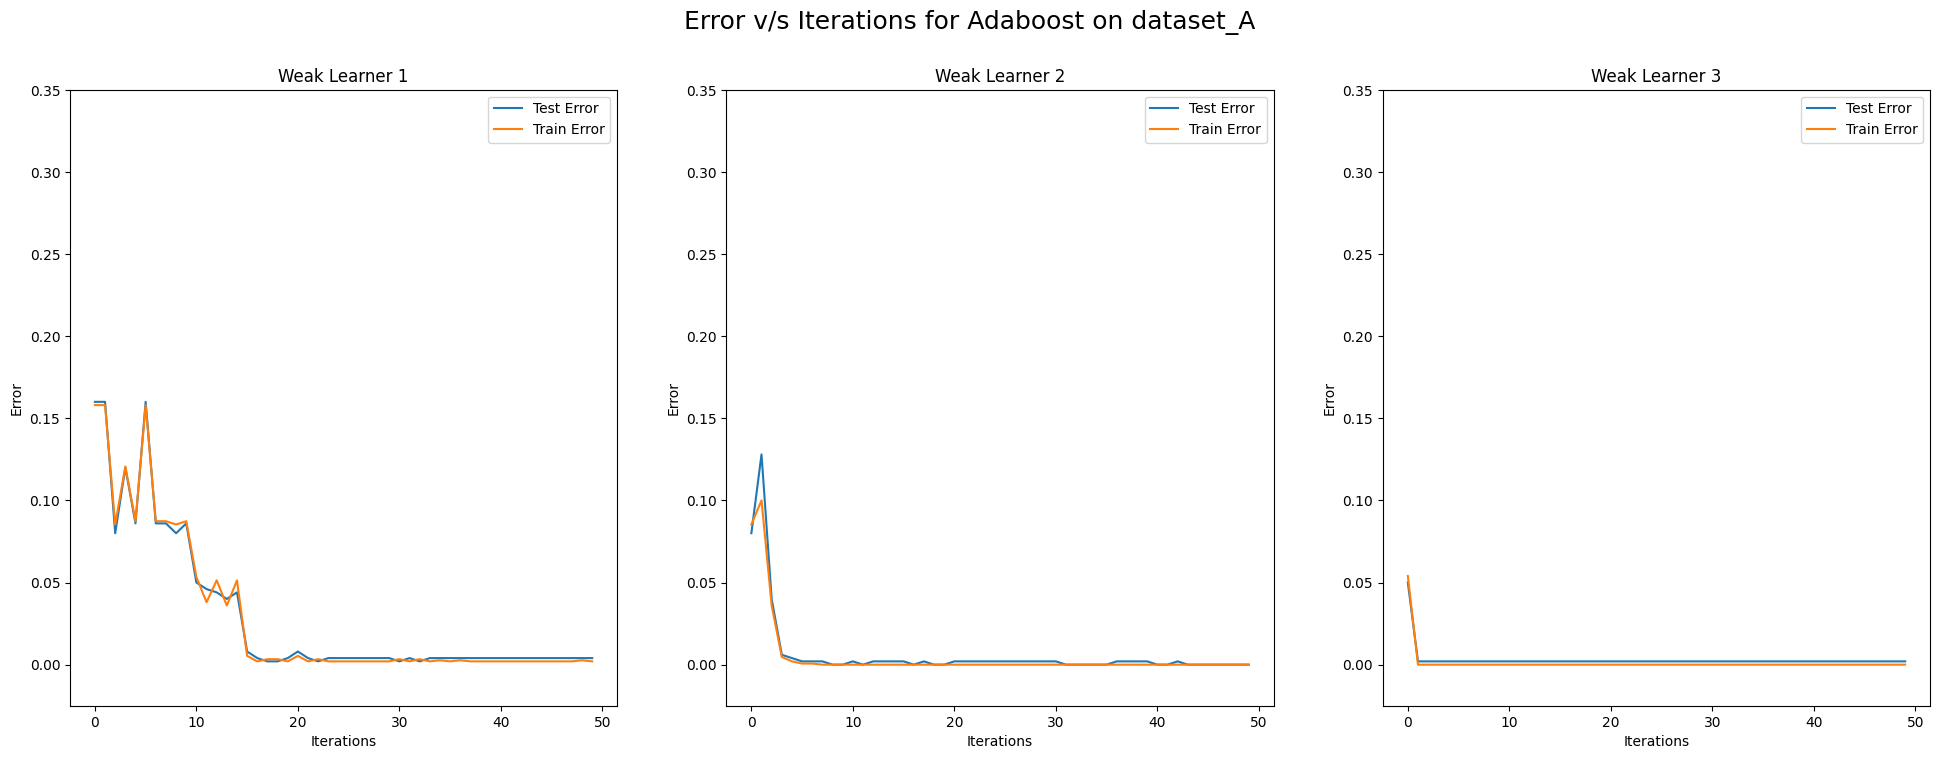

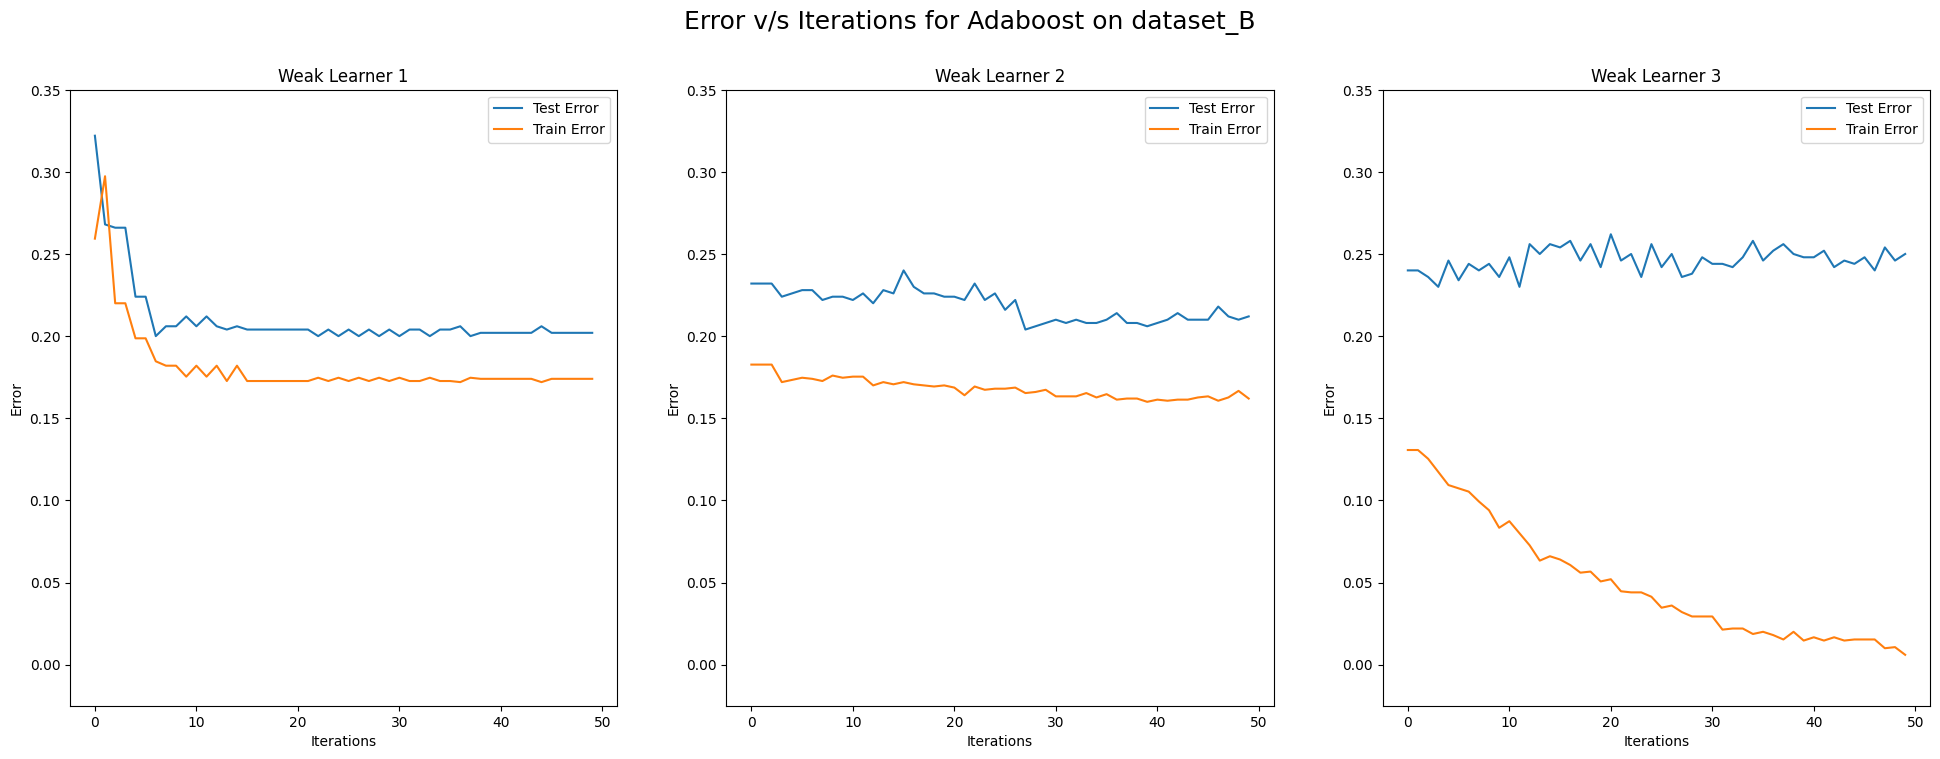

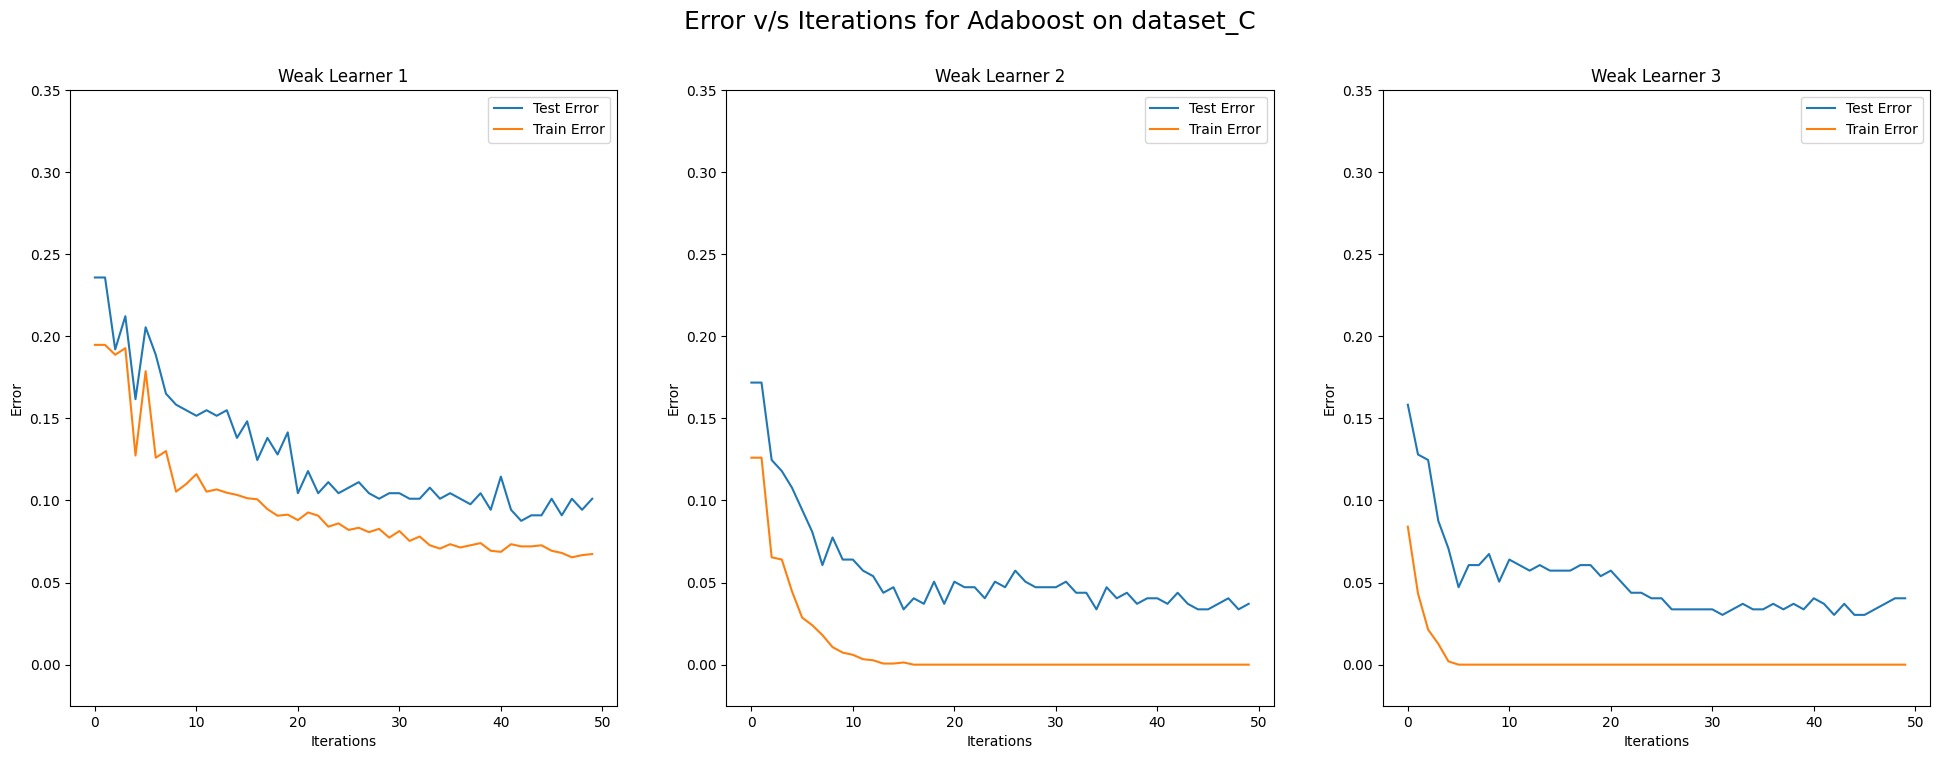

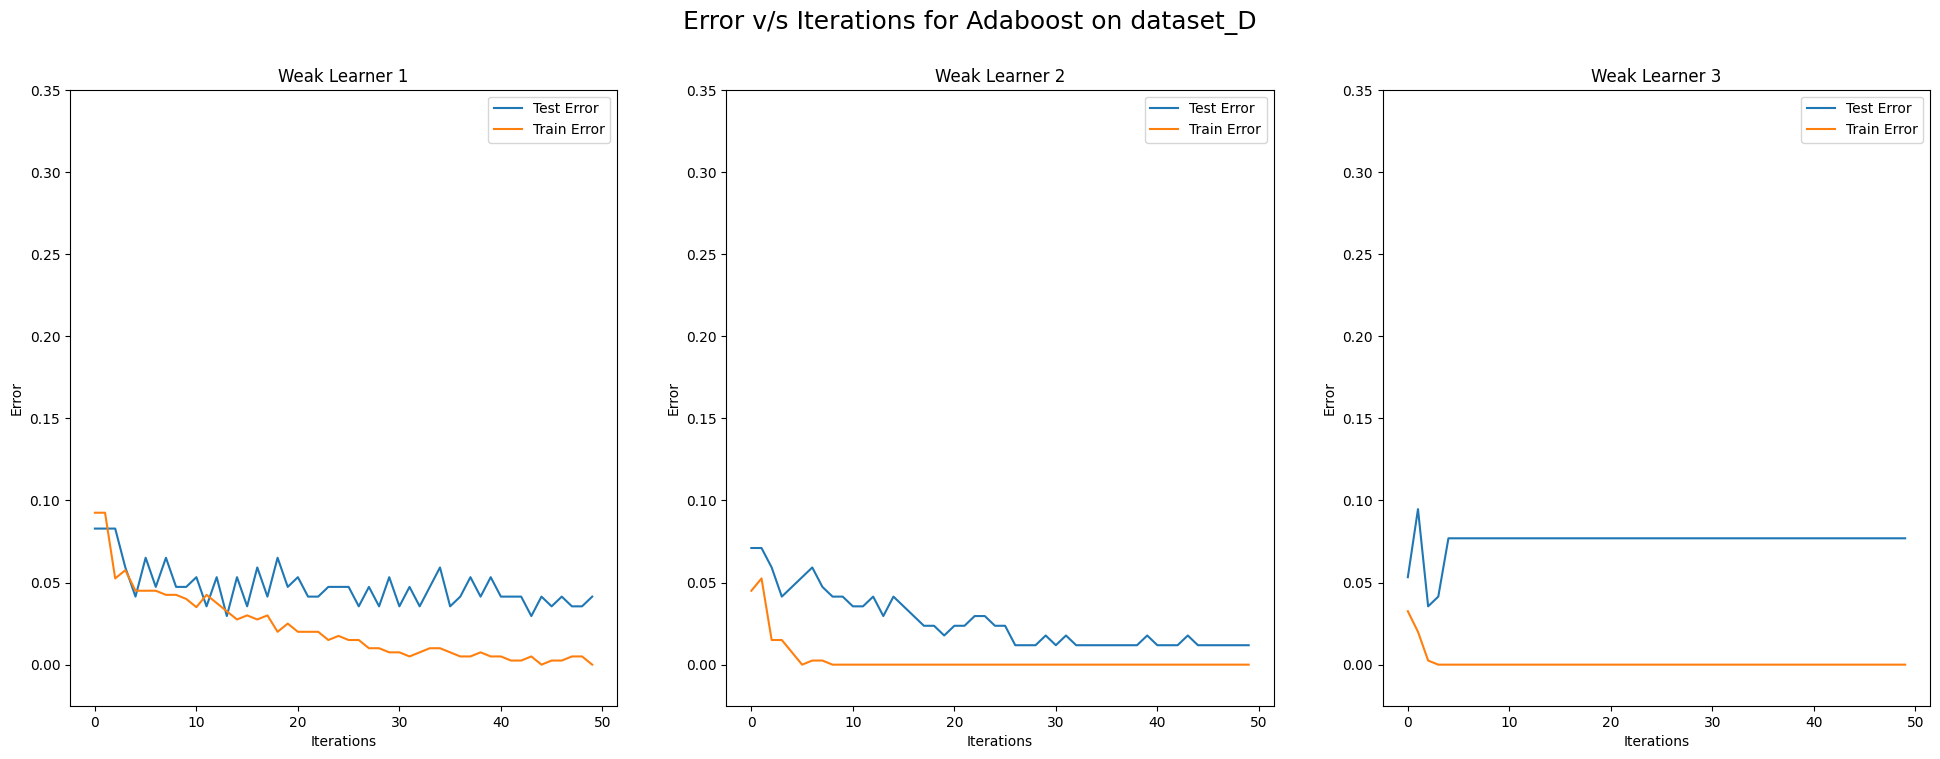

In [8]:
# Codewrite cell 
# Plots for iteration vs error here
file_num = ['A','B','C','D']
num_learners = 3
X_train = {}
Y_train = {}
X_test = {}
Y_test = {}
train_error = np.zeros((len(file_num), num_learners))
test_error = np.zeros((len(file_num), num_learners))
train_errs = {}
test_errs = {}
betas = {}
learners = {}
for id in range(len(file_num)):
    data = np.load(f"dataset_{file_num[id]}.npz")
    X_tr, Y_tr, X_tst, Y_tst = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    X_train[id], Y_train[id], X_test[id], Y_test[id] = X_tr, Y_tr, X_tst, Y_tst
    n = X_train[id].shape[0]
    plt.figure(figsize = (24,8))
    ttl = 'Error v/s Iterations for Adaboost on dataset_' + file_num[id] 
    plt.suptitle(ttl, size = 18)
    for k, depth in enumerate([1,3,7]):
        plt.subplot(1,3,k+1)
        plt.gca().set_title(f"Weak Learner {k+1}")
        plt.gca().set_ylim([-0.025,0.3500])
        plt.gca().set_xlabel("Iterations")
        plt.gca().set_ylabel("Error")
        samples = np.append(X_train[id], X_test[id], axis=0)
        betas[(id,k)], learners[(id,k)] = adaboost(X_train[id], Y_train[id], depth)
        Y_ret = run_ada_iter(betas[(id,k)],learners[(id,k)], samples)
        train_err_temp = []
        test_err_temp = []
        for Y_pred in Y_ret:
            Y_pred1 = Y_pred[:n]
            Y_pred2 = Y_pred[n:]
            err1 = np.sum(Y_pred1 != Y_train[id])/Y_train[id].shape[0]
            train_err_temp.append(err1)
            err2 = np.sum(Y_pred2 != Y_test[id])/Y_test[id].shape[0]
            test_err_temp.append(err2)
        x = [(i+1) for i in range(50)]
        plt.plot(np.array(test_err_temp), label = "Test Error")
        plt.plot(np.array(train_err_temp), label = "Train Error")
        train_errs[(id,k)] = train_err_temp
        test_errs[(id,k)] = test_err_temp
        plt.legend()
    plt.show()

<Figure size 640x480 with 0 Axes>

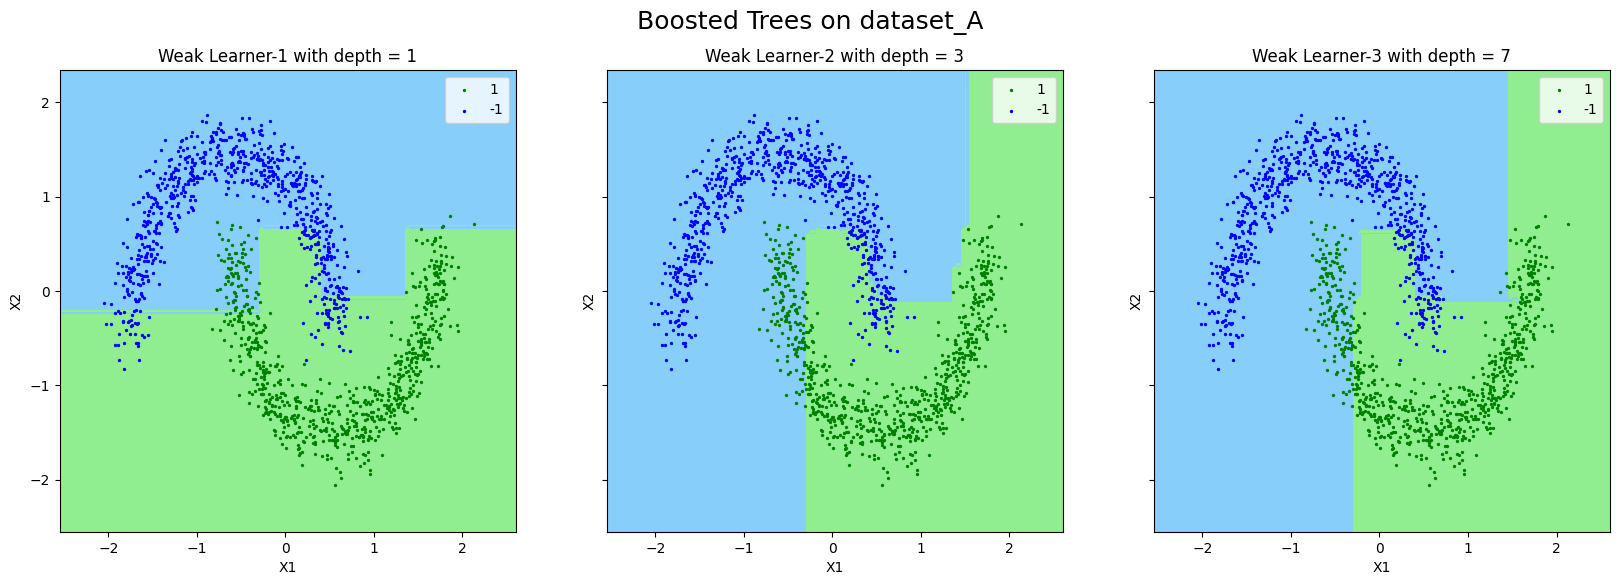

<Figure size 640x480 with 0 Axes>

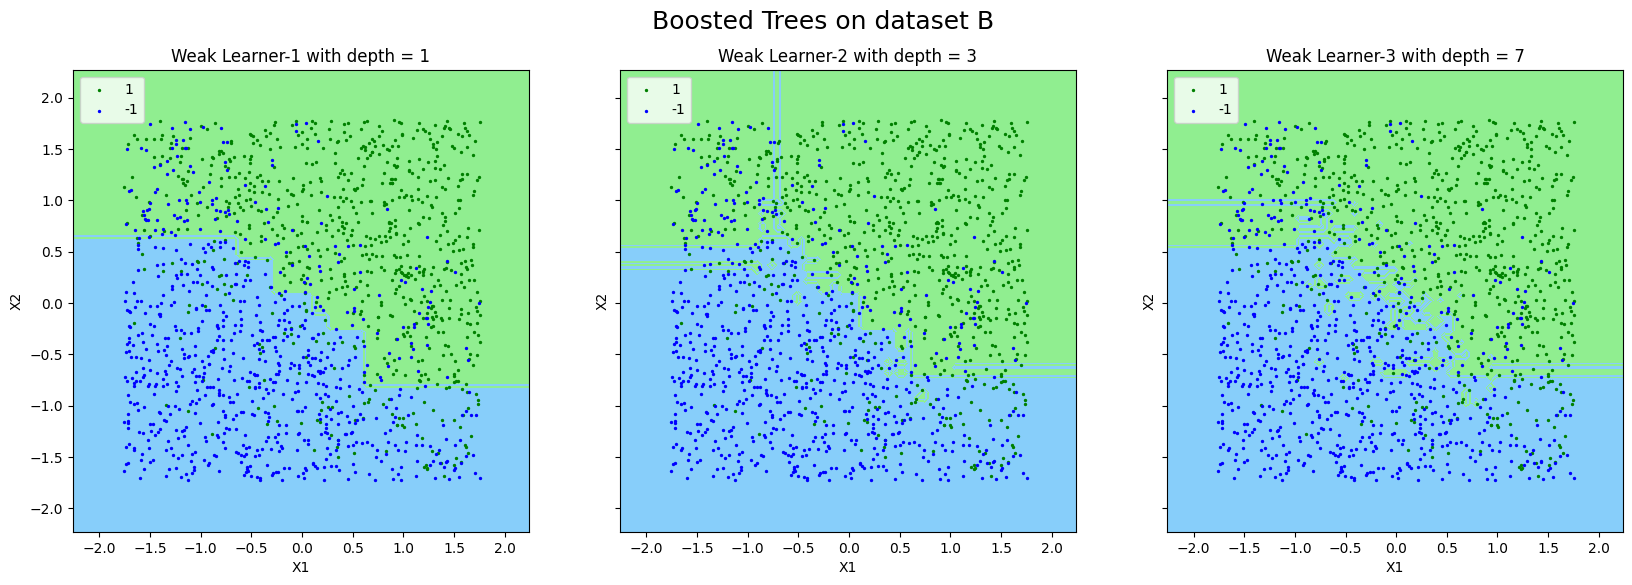

In [18]:
# Codewrite cell 
# Plots for illustrating the classifier here
X_train, Y_train, X_test, Y_test = preprocess('dataset_A.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
y_pred_1 = run_ada(betas[(0,0)],learners[(0,0)], testing_set)
y_pred_2 = run_ada(betas[(0,1)],learners[(0,1)], testing_set)
y_pred_3 = run_ada(betas[(0,2)],learners[(0,2)], testing_set)
plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(20,6))
f.suptitle('Boosted Trees on dataset_A', size = 18)
ax[0].contourf(X,Y,y_pred_1.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax[1].contourf(X,Y,y_pred_2.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax[2].contourf(X,Y,y_pred_3.reshape(X.shape), colors=['lightskyblue','lightgreen'])
learner_order = [1,2,3]
depths = [1,3,7]
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='g', label='1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='b',label='-1')
    a.set_title(f'Weak Learner-{learner_order[i]} with depth = {depths[i]}')
    a.set_xlabel('X1')
    a.set_ylabel('X2')
    a.legend()
plt.show()

X_train, Y_train, X_test, Y_test = preprocess('dataset_B.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
y_pred_1 = run_ada(betas[(1,0)],learners[(1,0)], testing_set)
y_pred_2 = run_ada(betas[(1,1)],learners[(1,1)], testing_set)
y_pred_3 = run_ada(betas[(1,2)],learners[(1,2)], testing_set)
plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(20,6))
f.suptitle('Boosted Trees on dataset B', size = 18)
ax[0].contourf(X,Y,y_pred_1.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax[1].contourf(X,Y,y_pred_2.reshape(X.shape), colors=['lightskyblue','lightgreen'])
ax[2].contourf(X,Y,y_pred_3.reshape(X.shape), colors=['lightskyblue','lightgreen'])
learner_order = [1,2,3]
depths = [1,3,7]
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='g', label='1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='b',label='-1')
    a.set_title(f'Weak Learner-{learner_order[i]} with depth = {depths[i]}')
    a.set_xlabel('X1')
    a.set_ylabel('X2')
    a.legend()
plt.show()

Textwrite cell:

**Observations:**
1. The Error v/s Iterations plot shows that after a few iterations, even a seemingly simple classifier like the one node decision tree can be boosted to perform similarly to random forests.
2. The majority of weak learner and dataset combinations only require a few iterations before the errors converge to a constant value, indicating that boosting provides a rapid path to the best performance.
3. Weak learner-3 only reduces the train error for dataset B; the test error remains high. Overfitting may be to blame, in which case a 1 node decision tree performs better on test data.
4. Deeper trees converge faster while training
5. Weak Learner-1, with a depth of 1, can provide relatively straightforward decision boundaries, whereas Weak Learner 3, with a depth of 7, can provide incredibly complex decision boundaries.

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set. 

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional). 




In [12]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs
    
    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

In [13]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need 
# like evaluating the mean squared error or the gradient w.r.t. w
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_mse(X, y, w):
    return 2 * np.dot(X.T, (np.dot(X, w) - y)) / X.shape[0]

data = np.load("LassoReg_data.npz")
X = data['arr_0']
y = data['arr_1']

# Data Split
num_samples = X.shape[0]
num_train = int(0.5 * num_samples)
num_val = int(0.25 * num_samples)
num_test = num_samples - num_train - num_val

X_train = X[:num_train]
y_train = y[:num_train]

X_val = X[num_train:num_train+num_val]
y_val = y[num_train:num_train+num_val]

X_test = X[num_train+num_val:]
y_test = y[num_train+num_val:]

In [ ]:
# codewrite cell:
# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set
def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, l1_norm, epochs=1000, tol=1e-5):
    w = np.random.randn(X_train.shape[1])

    for epoch in range(epochs):
        grad = gradient_mse(X_train, y_train, w)

        w -= learning_rate * grad
        w = projection_oracle_l1(w, l1_norm)

        train_loss = mean_squared_error(y_train, np.dot(X_train, w))
        val_loss = mean_squared_error(y_val, np.dot(X_val, w))

        if np.linalg.norm(grad) < tol:            
            break

    return w, train_loss, val_loss

def validate_model(X_val, y_val, w):
    val_loss = mean_squared_error(y_val, np.dot(X_val, w))
    return val_loss

learning_rates = [0.001, 0.01, 0.1]
l1_norms = [0.1, 0.5, 1.0]

best_val_loss = float('inf')
best_params = None

for lr in learning_rates:
    for l1 in l1_norms:
        #print(f"Training with learning rate: {lr}, L1 norm: {l1}")
        w, train_loss, val_loss = gradient_descent(X_train, y_train, X_val, y_val, lr, l1)
        #print(f"Training Loss: {train_loss}, Validation Loss: {val_loss}")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_params = (lr, l1)

#print(f"Best parameters: Learning Rate = {best_params[0]}, L1 Norm = {best_params[1]}")

best_lr, best_l1 = best_params
w, train_loss, val_loss = gradient_descent(X_train, y_train, X_val, y_val, best_lr, best_l1)
test_loss = mean_squared_error(y_test, np.dot(X_test, w))
#print(f"Test Loss with best parameters: {test_loss}")

top_indices = np.argsort(np.abs(w))[::-1][:10]
top_weights = w[top_indices]
#print("Top 10 weights and their indices:")
#for i, (index, weight) in enumerate(zip(top_indices, top_weights)):
#    print(f"Index: {index}, Weight: {weight}")

#Textwrite cell:

*The best parameters observed are:* 

**Learning Rate = 0.1**   ,   **L1 Norm = 1**

*The Losses corresponding to the best parameters are:*

**Training Loss = 0.084** ,    **Validation Loss = 0.09**  , **Test Loss = 0.104**

*Top 10 weights and their indices:*

1. Index: 107, Weight: 0.862

2. Index: 390, Weight: 0.134

3. Index: 711, Weight: 9.66-08

4. Index: 960, Weight: -8.832e-08

5. Index: 568, Weight: 7.906e-08

6. Index: 722, Weight: 7.465e-08

7. Index: 184, Weight: -7.33e-08

8. Index: 716, Weight: -6.829e-08

9. Index: 806, Weight: -5.443e-08

10. Index: 410, Weight: -1.134e-08